In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("emploi.csv")
df.head(2)

,Job Title,Company Name,Job Description,Study Level,Experience Level,Contract Type,Region,Skills,Posting Date,Job Link
0,Business Developer Anglophone​ - Ariana,SMART CONSEIL,NaN,"Bac, Bac+1, Bac+2, Bac+3, Bac+4 & Bac+5 et plus","Etudiant, jeune diplômé et plus","CDI, CDD & Stage",Ariana & International,Gestion d'Équipe - Prospection - Vente,30.11.2024,https://www.emploitunisie.com/offre-emploi-tun...
1,Community Manager - Monastir,TAHRI COMPAGNE,NaN,Bac+3,Débutant < 2 ans et plus,CDI,Monastir,Analyse Marketing - Communication - Communicat...,30.11.2024,https://www.emploitunisie.com/offre-emploi-tun...


In [3]:
df1 = pd.read_csv("keejob.csv")
df1.head()

,Title,Company,Location,Job Type,Job Link,Référence,Publiée le,Type de poste,Lieu de travail,Expérience,Étude,Disponibilité,Langues,Salary,Mobility
0,Conseillers Client,TELEPERFORMANCE,Tunis,CDI,https://www.keejob.com/offres-emploi/211206/co...,211206,29 novembre 2024,CDI,"Centre ville, Tunis, Tunisie",Aucune expérience,Secondaire,Plein temps,Français,NaN,NaN
1,Chargé(e) de Service Clientèle - Sousse,BANK ABC,Tunis,Unspecified,https://www.keejob.com/offres-emploi/210308/ch...,210308,29 novembre 2024,NaN,"Tunis, Tunisie",Moins d'un an,Bac + 3,Plein temps,NaN,NaN,NaN
2,Développeur Java Medior,BINITNS,Tunis,CDI,https://www.keejob.com/offres-emploi/211371/d%...,211371,29 novembre 2024,CDI,"Tunis, Tunisie",Entre 2 et 5 ans,Bac + 5,Plein temps,Français,NaN,NaN
3,Acheteuse,PLASTIC ELECTROMECHANIC COMPANY PEC,Zaghouan,"CDI, ,, CDD",https://www.keejob.com/offres-emploi/211433/ac...,211433,29 novembre 2024,"CDI, ,, CDD","Bir Mcherga, Zaghouan, Tunisie",Entre 2 et 5 ans,Bac + 3,Plein temps,"Français , Anglais",NaN,International
4,Ingénieur Qualité Client,ASTEELFLASH,Ariana,Unspecified,https://www.keejob.com/offres-emploi/212102/in...,212102,29 novembre 2024,NaN,"Ariana, Tunisie",Entre 2 et 5 ans,Bac + 5,Plein temps,"Français , Anglais",1 - 0 DT / Mois,NaN


In [7]:
mois_mapping = {
    "janvier": "01",
    "février": "02",
    "mars": "03",
    "avril": "04",
    "mai": "05",
    "juin": "06",
    "juillet": "07",
    "août": "08",
    "septembre": "09",
    "octobre": "10",
    "novembre": "11",
    "décembre": "12"
}

# Nettoyer les données pour standardiser les dates
def clean_date(date_str):
    if pd.isna(date_str) or not isinstance(date_str, str):
        return None
    for mois, num in mois_mapping.items():
        date_str = date_str.lower().replace(mois, num)
    return date_str

df1['Publiée le'] = df1['Publiée le'].apply(clean_date)
df1.head()

,Title,Company,Location,Job Type,Job Link,Référence,Publiée le,Type de poste,Lieu de travail,Expérience,Étude,Disponibilité,Langues,Salary,Mobility,Cleaned_Date
0,Conseillers Client,TELEPERFORMANCE,Tunis,CDI,https://www.keejob.com/offres-emploi/211206/co...,211206,29 11 2024,CDI,"Centre ville, Tunis, Tunisie",Aucune expérience,Secondaire,Plein temps,Français,NaN,NaN,29 11 2024
1,Chargé(e) de Service Clientèle - Sousse,BANK ABC,Tunis,Unspecified,https://www.keejob.com/offres-emploi/210308/ch...,210308,29 11 2024,NaN,"Tunis, Tunisie",Moins d'un an,Bac + 3,Plein temps,NaN,NaN,NaN,29 11 2024
2,Développeur Java Medior,BINITNS,Tunis,CDI,https://www.keejob.com/offres-emploi/211371/d%...,211371,29 11 2024,CDI,"Tunis, Tunisie",Entre 2 et 5 ans,Bac + 5,Plein temps,Français,NaN,NaN,29 11 2024
3,Acheteuse,PLASTIC ELECTROMECHANIC COMPANY PEC,Zaghouan,"CDI, ,, CDD",https://www.keejob.com/offres-emploi/211433/ac...,211433,29 11 2024,"CDI, ,, CDD","Bir Mcherga, Zaghouan, Tunisie",Entre 2 et 5 ans,Bac + 3,Plein temps,"Français , Anglais",NaN,International,29 11 2024
4,Ingénieur Qualité Client,ASTEELFLASH,Ariana,Unspecified,https://www.keejob.com/offres-emploi/212102/in...,212102,29 11 2024,NaN,"Ariana, Tunisie",Entre 2 et 5 ans,Bac + 5,Plein temps,"Français , Anglais",1 - 0 DT / Mois,NaN,29 11 2024


In [11]:
import pandas as pd

# Load the datasets
df_emploi = pd.read_csv("emploi.csv")
df_keejob = pd.read_csv("keejob.csv")

# Rename columns in df_keejob to match df_emploi
df_keejob.rename(columns={
    "Title": "Job Title",
    "Company": "Company Name",
    "Location": "Region",
    "Job Type": "Contract Type",
    "Publiée le": "Posting Date",
    "Job Link": "Job Link",
    "Étude": "Study Level", 
    "Expérience": "Experience Level"  
}, inplace=True)

# Ensure df_keejob has only relevant columns and add missing ones with default values
required_columns = ['Job Title', 'Company Name', 'Region', 'Contract Type', 'Posting Date', 
                    'Job Link', 'Study Level', 'Experience Level', 'Disponibilité', 
                    'Langues', 'Salary', 'Mobility']

# Retain only required columns in df_keejob
df_keejob = df_keejob.reindex(columns=required_columns, fill_value=None)

# Ensure df_emploi has all required columns, adding missing ones with default values
for col in required_columns:
    if col not in df_emploi.columns:
        df_emploi[col] = None

# Clean and standardize the "Posting Date" column
# Define a mapping for months in French to numeric values
mois_mapping = {
    "janvier": "01", "février": "02", "mars": "03", "avril": "04", "mai": "05",
    "juin": "06", "juillet": "07", "août": "08", "septembre": "09", 
    "octobre": "10", "novembre": "11", "décembre": "12"
}

# Function to clean and convert French dates to a standard format
def clean_date(date_str):
    if pd.isna(date_str) or not isinstance(date_str, str):
        return None
    for mois, num in mois_mapping.items():
        date_str = date_str.lower().replace(mois, num)
    return date_str

# Apply cleaning to df_keejob
df_keejob['Posting Date'] = df_keejob['Posting Date'].apply(clean_date)

# Convert cleaned dates to datetime objects
df_emploi['Posting Date'] = pd.to_datetime(df_emploi['Posting Date'], errors='coerce')
df_keejob['Posting Date'] = pd.to_datetime(df_keejob['Posting Date'], format='%d %m %Y', errors='coerce')

# Combine the two datasets
combined_df = pd.concat([df_emploi, df_keejob], ignore_index=True)

# Drop unnecessary columns, if they exist
if 'Job Description' in combined_df.columns:
    combined_df = combined_df.drop(columns=['Job Description'])

# Display the first few rows of the combined dataframe
combined_df.head()


C:\Users\21692\AppData\Local\Temp\ipykernel_80440\1722863721.py:52: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_emploi['Posting Date'] = pd.to_datetime(df_emploi['Posting Date'], errors='coerce')


,Job Title,Company Name,Study Level,Experience Level,Contract Type,Region,Skills,Posting Date,Job Link,Disponibilité,Langues,Salary,Mobility
0,Business Developer Anglophone​ - Ariana,SMART CONSEIL,"Bac, Bac+1, Bac+2, Bac+3, Bac+4 & Bac+5 et plus","Etudiant, jeune diplômé et plus","CDI, CDD & Stage",Ariana & International,Gestion d'Équipe - Prospection - Vente,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
1,Community Manager - Monastir,TAHRI COMPAGNE,Bac+3,Débutant < 2 ans et plus,CDI,Monastir,Analyse Marketing - Communication - Communicat...,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
2,Docteur en Data Science ou en Informatique - A...,SMART CONSEIL,Bac+5 et plus,Expérience entre 2 ans et 5 ans et plus,CDI - CDD,Ariana - Béja - Ben Arous - Bizerte - Gabès - ...,NaN,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
3,Formation en Data Engineer (F/H) - Paris,KAISCHOOL,"Bac+3, Bac+4 & Bac+5 et plus","Etudiant, jeune diplômé et plus",Alternance,International,APACHE - BIG DATA - Comptabilité - Finance - G...,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
4,Consultant Fonctionnel Sage XRT ou Sage FRP 10...,DELTASOFT INTERNATIONAL,Bac+5 et plus,Expérience entre 2 ans et 5 ans,CDI - Statutaire,Ariana - Béja - Ben Arous - Bizerte - Gabès - ...,Comptabilité - Finance - Gestion - SAGE - TMS ...,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None


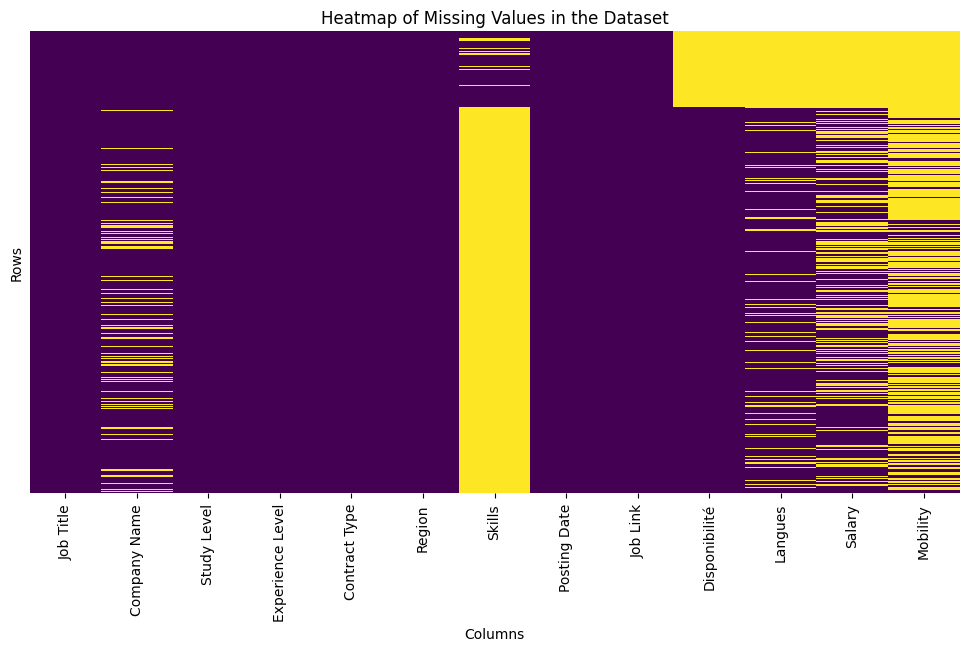

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame indicating missing values (True for missing, False for non-missing)
missing_values = combined_df.isnull()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_values, cmap="viridis", cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values in the Dataset")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


In [6]:
print(combined_df.shape)

(1482, 13)


In [7]:
# Clean the contract types by stripping spaces and replacing unwanted characters
combined_df["Contract Type"] = combined_df["Contract Type"].str.strip()  # Remove leading/trailing spaces

# Remove commas, replace them with nothing (i.e., strip commas)
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace(",", "", regex=False)

# Replace '&' and '/' with '-'
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace(" & ", "-", regex=False)  # Replace '&' with '-'
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace(" / ", "-", regex=False)  # Replace ' / ' with '-'
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace("/", "-", regex=False)  # Replace ' / ' with '-'

# Split the "Contract Type" column by '-' and then flatten the values
split_contract_types = combined_df["Contract Type"].str.split("-", expand=True).stack()

# Drop any empty or NaN values and remove extra spaces
split_contract_types = split_contract_types[split_contract_types.str.strip() != '']

# Further split by spaces to make the contract types more logical
split_contract_types = split_contract_types.str.split(" ", expand=True).stack()

# Normalize by stripping any remaining spaces
split_contract_types = split_contract_types.str.strip()

# Get the unique contract types and sort them
unique_contract_types = sorted(split_contract_types.unique())

print(unique_contract_types[1:])


['Alternance', 'CDD', 'CDI', 'Fonction', 'Freelance', 'Indépendant', 'Intérim', 'PFE', 'SIVP', 'Saisonnier', 'Stage', 'Statutaire', 'Temps', 'Unspecified', 'partiel', 'publique']


In [8]:
unique_contract_types=['Alternance', 'CDD', 'CDI', 'Fonction publique', 'Indépendant-Freelance', 'Intérim', 'Stage-PFE', 'SIVP', 'Saisonnier', 'Stage', 'Statutaire', 'Temps partiel', 'Unspecified']

                       Count
CDI                      799
CDD                      770
SIVP                     482
Unspecified              159
Stage                     62
Intérim                   31
Stage-PFE                 27
Indépendant-Freelance     25
Temps partiel             18
Saisonnier                13
Alternance                 9
Statutaire                 8
Fonction publique          2


C:\Users\21692\AppData\Local\Temp\ipykernel_130704\2654265261.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_type_summary_df.index, y=contract_type_summary_df["Count"], palette="viridis")


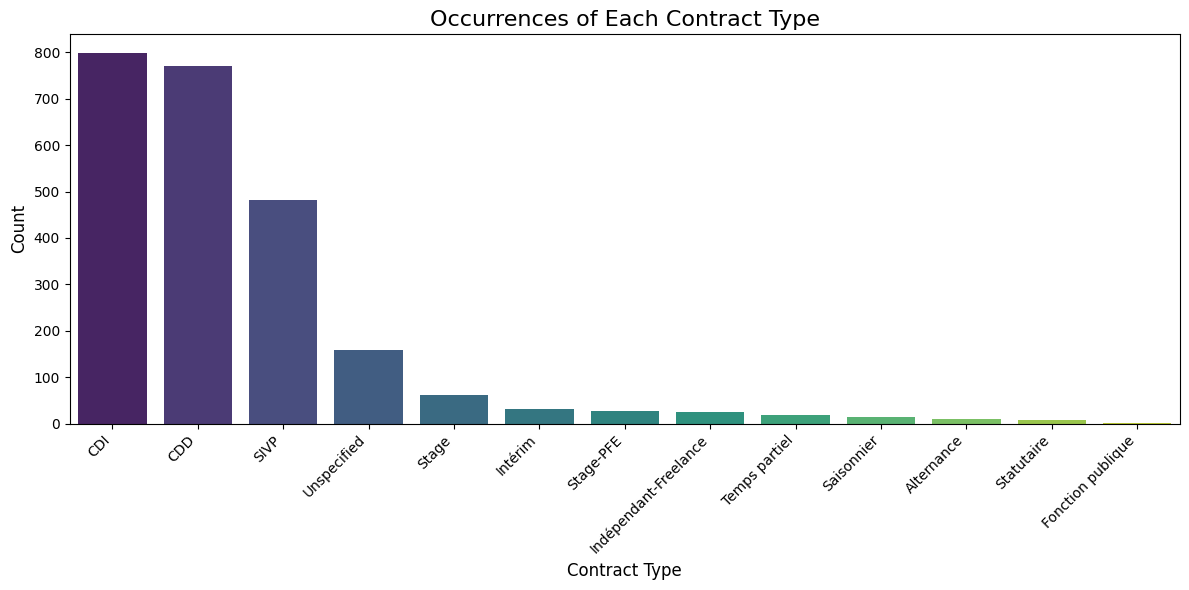

In [9]:
# Initialize a dictionary to store counts for each contract type
contract_type_summary = {}

# Iterate through the unique contract types
for contract_type in unique_contract_types:
    # Check if the current contract type is present in each row
    count = combined_df["Contract Type"].str.contains(contract_type, na=False).sum()
    # Store the count in the dictionary
    contract_type_summary[contract_type] = count

# Convert the summary to a DataFrame for visualization
contract_type_summary_df = pd.DataFrame.from_dict(contract_type_summary, orient="index", columns=["Count"])
contract_type_summary_df = contract_type_summary_df.sort_values(by="Count", ascending=False)

# Display the DataFrame
print(contract_type_summary_df)

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=contract_type_summary_df.index, y=contract_type_summary_df["Count"], palette="viridis")
plt.title("Occurrences of Each Contract Type", fontsize=16)
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


Français       1020
Arabe           654
Anglais         554
Italien          29
Allemand         17
Espagnol         10
Portugais         5
Néerlandais       2
Russe             2
Chinois           1
Japonais          1
Name: count, dtype: int64


C:\Users\21692\AppData\Local\Temp\ipykernel_130704\1376053518.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


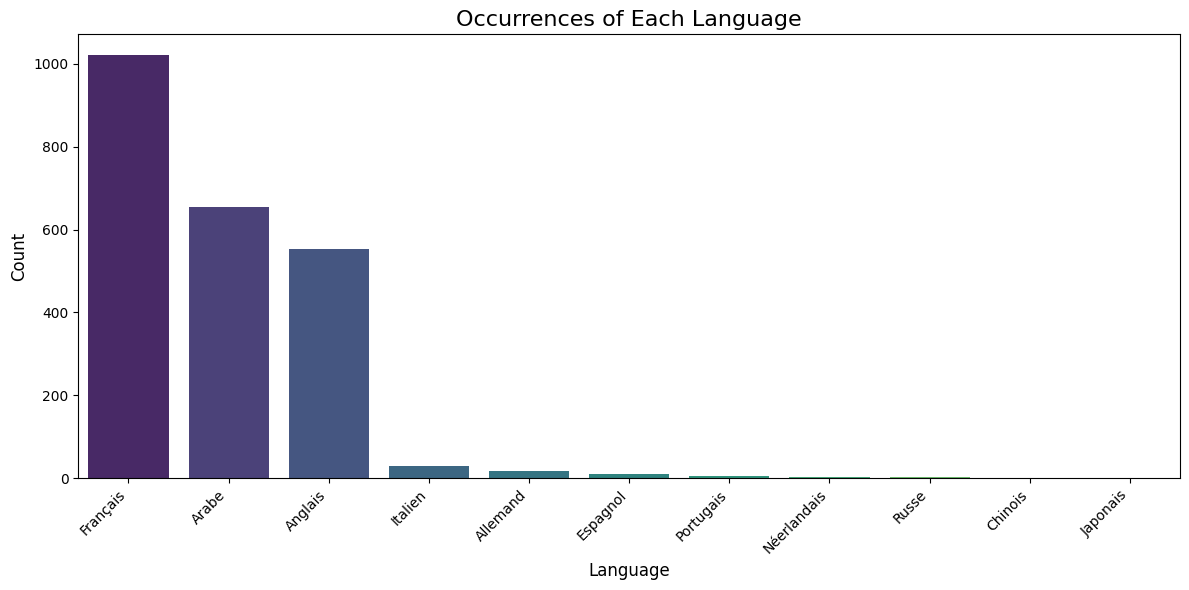

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the "Langues" column into individual languages, stack, and strip whitespace
all_languages = combined_df["Langues"].str.split(",", expand=True).stack().str.strip()

# Count occurrences of each unique language
language_counts = all_languages.value_counts()

# Display the counts
print(language_counts)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Occurrences of Each Language", fontsize=16)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


Tunis            532
Ariana           330
Ben Arous        193
Sousse           134
Zaghouan          96
Bizerte           88
Nabeul            68
Béja              58
Sfax              57
Gabès             49
Jendouba          49
Manouba           49
Gafsa             48
International     34
Monastir          28
Médenine          17
Kairouan          10
Gabes              8
Mahdia             6
Le Kef             2
Siliana            1
Abidjan            1
DAKAR              1
TRIPOLI            1
Tozeur             1
Sidi Bouzid        1
Tataouine          1
Name: count, dtype: int64


C:\Users\21692\AppData\Local\Temp\ipykernel_130704\4106310275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")


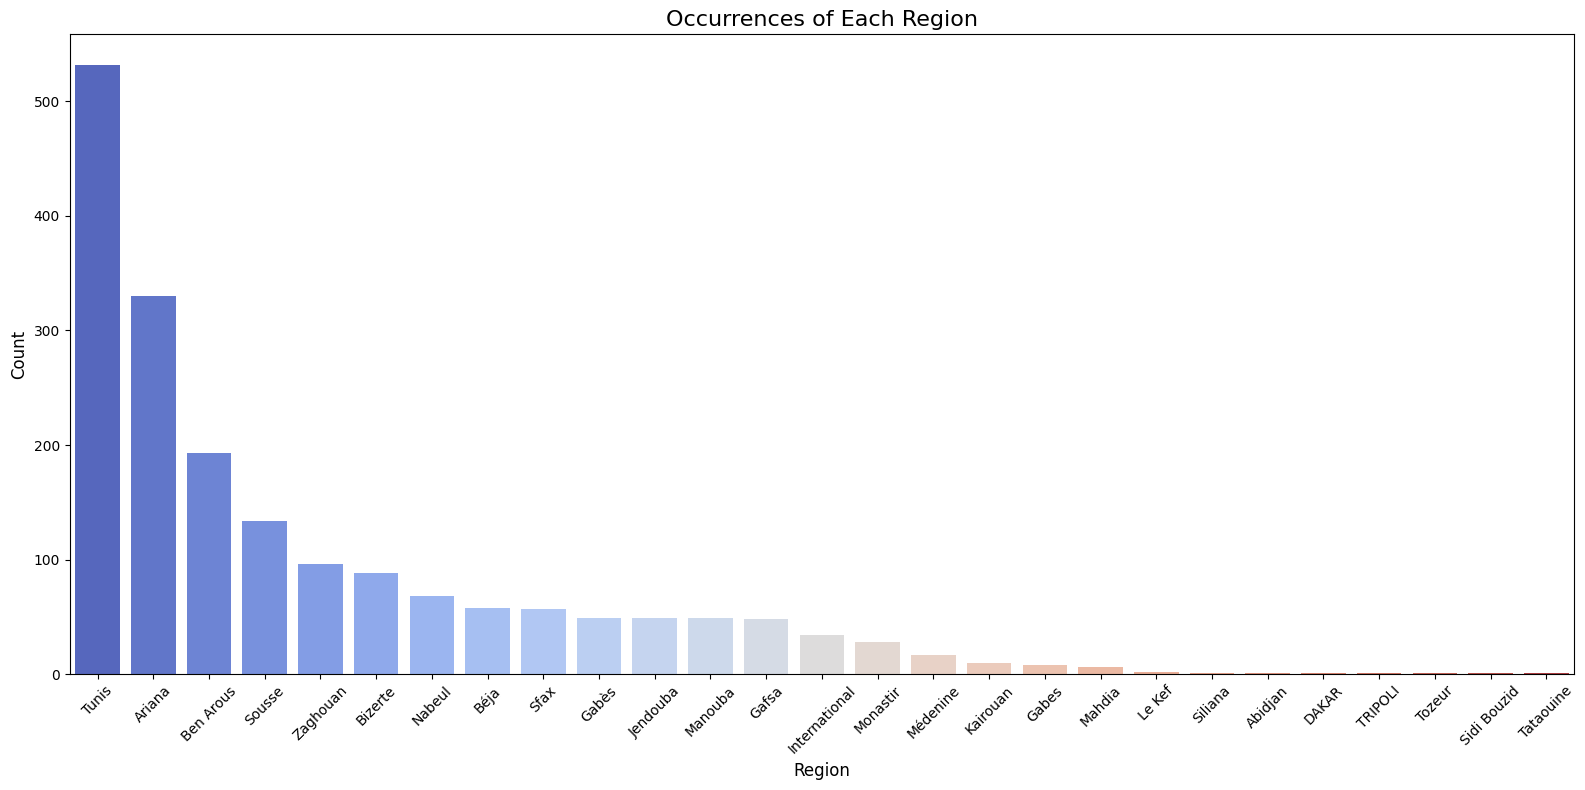

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the "Region" column into individual regions, stack, and strip whitespace
all_regions = combined_df["Region"].str.split(" - | & |, ", expand=True).stack().str.strip()

# Standardize the names to unify similar regions
all_regions.replace({"La Manouba": "Manouba"}, inplace=True)

# Count occurrences of each unique region
region_counts = all_regions.value_counts()

# Display the counts
print(region_counts)

# Plot the results
plt.figure(figsize=(16, 8))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")
plt.title("Occurrences of Each Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# Clean the contract types by stripping spaces and replacing unwanted characters
combined_df["Study Level"] = combined_df["Study Level"].str.strip()  # Remove leading/trailing spaces

# Remove commas, replace them with nothing (i.e., strip commas)
combined_df["Study Level"] = combined_df["Study Level"].str.replace(",", "", regex=False)

# Replace '&' and '/' with '-'
combined_df["Study Level"] = combined_df["Study Level"].str.replace(" & ", "-", regex=False)  # Replace '&' with '-'
combined_df["Study Level"] = combined_df["Study Level"].str.replace(" / ", "-", regex=False)  # Replace ' / ' with '-'
combined_df["Study Level"] = combined_df["Study Level"].str.replace("/", "-", regex=False)  # Replace ' / ' with '-'

# Split the "Contract Type" column by '-' and then flatten the values
split_Study_Levels = combined_df["Study Level"].str.split("-", expand=True).stack()

# Drop any empty or NaN values and remove extra spaces
split_Study_Levels = split_Study_Levels[split_Study_Levels.str.strip() != '']

# Further split by spaces to make the contract types more logical
split_Study_Levels = split_Study_Levels.str.split(" ", expand=True).stack()


# Normalize by stripping any remaining spaces
split_Study_Levels = split_Study_Levels.str.strip()

# Get the unique contract types and sort them
unique_Study_Levels = sorted(split_Study_Levels.unique())

# Display the unique contract types
print(unique_Study_Levels)


['', '+', '1', '2', '3', '4', '5', 'Bac', 'Bac+1', 'Bac+2', 'Bac+3', 'Bac+4', 'Bac+5', 'Doctorat', 'Expert', 'Formations', 'Primaire', 'Qualification', 'Recherche', 'Secondaire', 'avant', 'bac', 'et', 'plus', 'professionnelles']


In [14]:
unique_Study_Levels = ['Bac', 'Bac+1', 'Bac+2', 'Bac+3', 'Bac+4', 'Bac+5', 'Doctorat', 'Expert Recherche', 'Primaire', 'Secondaire', 'Qualification avant bac', 'et plus', 'Formations professionnelles']


Nombre d'offres par niveau d'étude :
Bac: 148
Bac+1: 86
Bac+2: 199
Bac+3: 775
Bac+4: 193
Bac+5: 395
Qualification avant bac: 56
Formations professionnelles: 93
Autres: 162


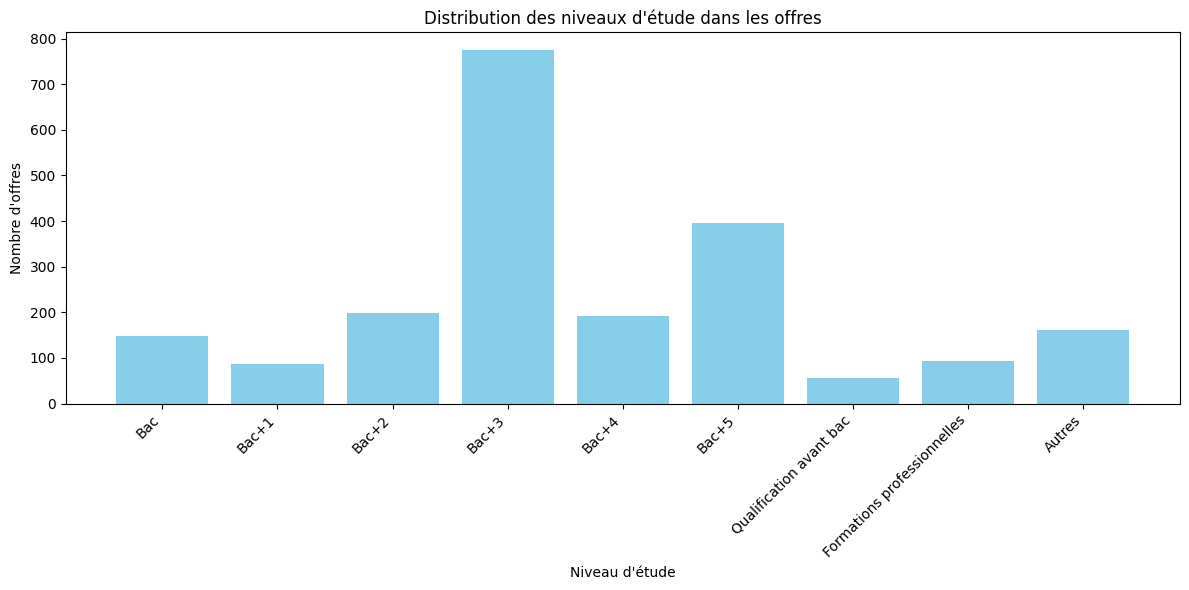

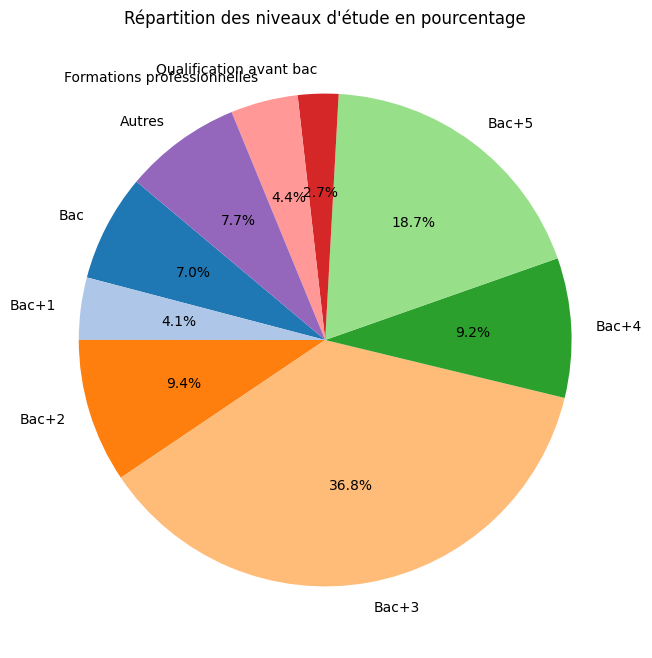

In [17]:
import re
import matplotlib.pyplot as plt

# Initialisation du dictionnaire pour stocker les regroupements
study_level_counts = {}

# Boucle pour compter les niveaux d'études
for level in unique_Study_Levels:
    if "Bac+" in level:  # Niveaux "Bac+N"
        count_spaces = combined_df[combined_df["Study Level"].str.contains(r'\bBac\s*\+\s*' + re.escape(level.split('+')[1]) + r'\b', case=False, na=False)].shape[0]
        total_count = count_spaces
        study_level_counts[level] = total_count
    elif "Bac" in level:  # Niveau "Bac" (sans Bac+)
        count_bac = combined_df[combined_df["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                               ~combined_df["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)].shape[0]
        study_level_counts['Bac'] = count_bac
    else:
        count = combined_df[combined_df["Study Level"].str.contains(r'\b' + re.escape(level) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count

# Regrouper les catégories demandées
study_level_counts["Qualification avant bac"] += study_level_counts.pop("Secondaire", 0)

autres_categories = ["Primaire", "Expert Recherche", "et plus", "Doctorat"]
study_level_counts["Autres"] = sum([study_level_counts.pop(cat, 0) for cat in autres_categories])

# Affichage des résultats
print("Nombre d'offres par niveau d'étude :")
for level, count in study_level_counts.items():
    print(f"{level}: {count}")

# Préparer les données pour le graphique
study_levels = list(study_level_counts.keys())
counts = list(study_level_counts.values())

# Diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(study_levels, counts, color='skyblue')
plt.xlabel('Niveau d\'étude')
plt.ylabel('Nombre d\'offres')
plt.title('Distribution des niveaux d\'étude dans les offres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Diagramme en secteurs
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=study_levels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Répartition des niveaux d\'étude en pourcentage')
plt.show()


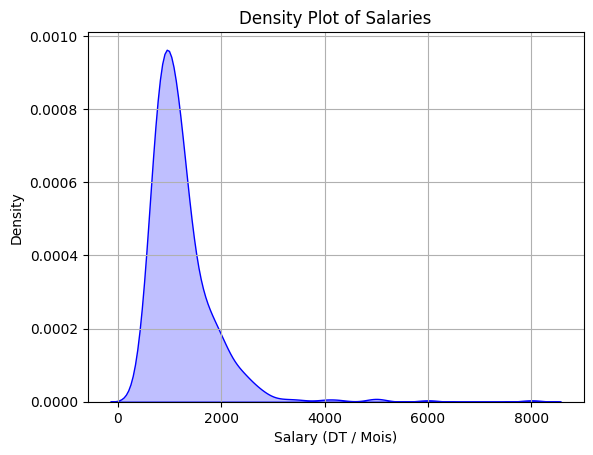

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to process the salary column
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Select only valid values (ignoring NaN in plotting)
valid_salaries = combined_df["Processed_Salary"]

# Plot the density (NaN values are automatically ignored)
sns.kdeplot(valid_salaries, fill=True, color="blue")
plt.title("Density Plot of Salaries")
plt.xlabel("Salary (DT / Mois)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


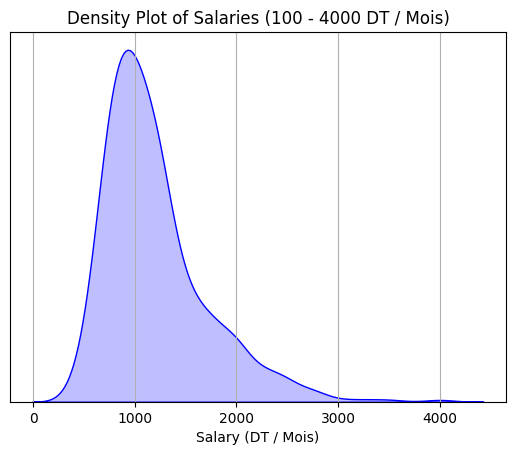

In [20]:
filtered_salaries = valid_salaries[(valid_salaries >= 100) & (valid_salaries <= 4000)]

# Tracer le graphique
sns.kdeplot(filtered_salaries, fill=True, color="blue")
plt.title("Density Plot of Salaries (100 - 4000 DT / Mois)")
plt.xlabel("Salary (DT / Mois)")
plt.ylabel("")  # Suppression des labels de l'axe Y
plt.yticks([])  # Suppression des ticks de l'axe Y
plt.grid(True)
plt.show()

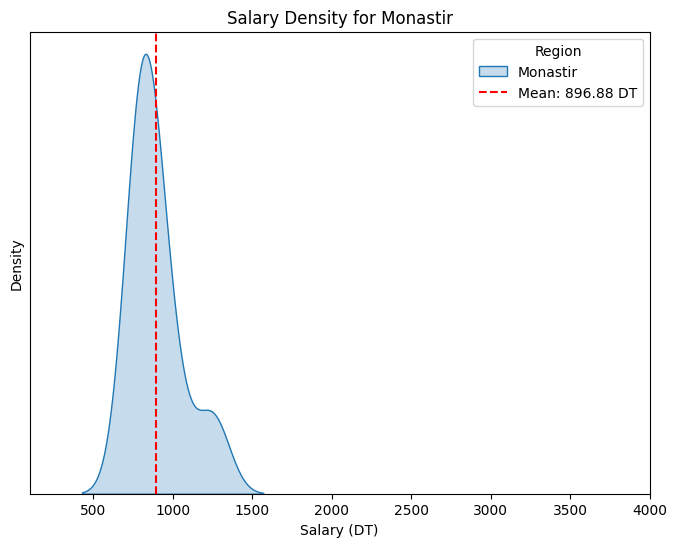

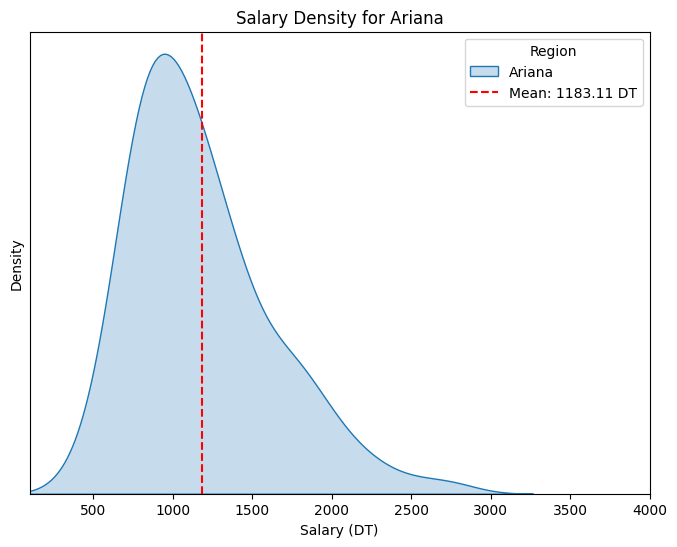

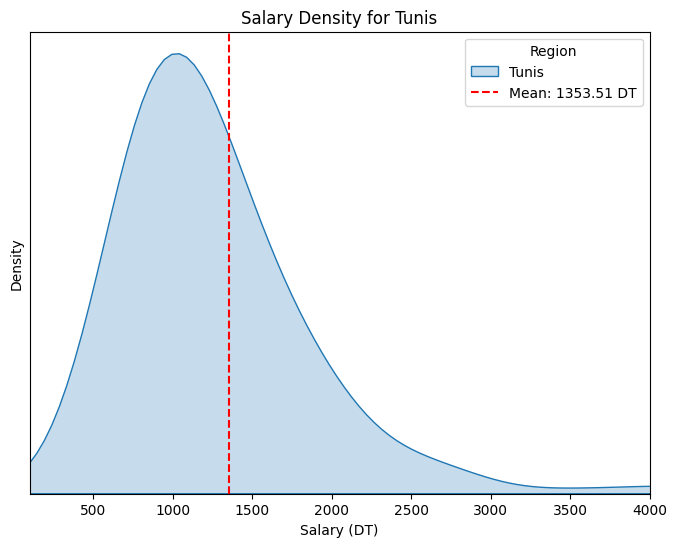

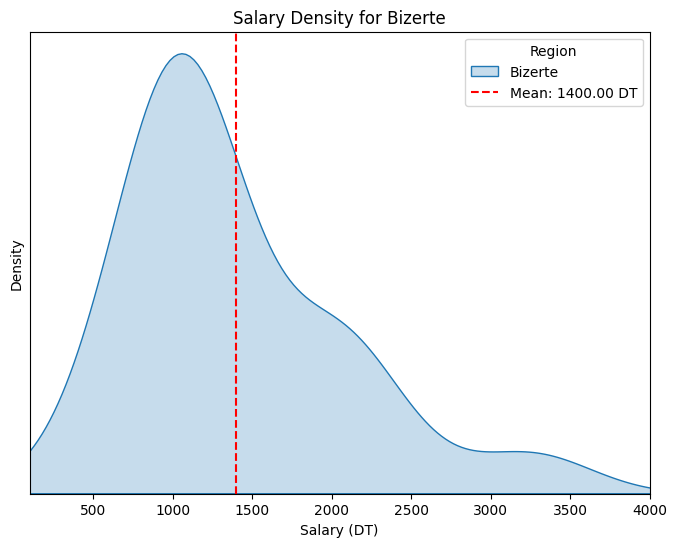

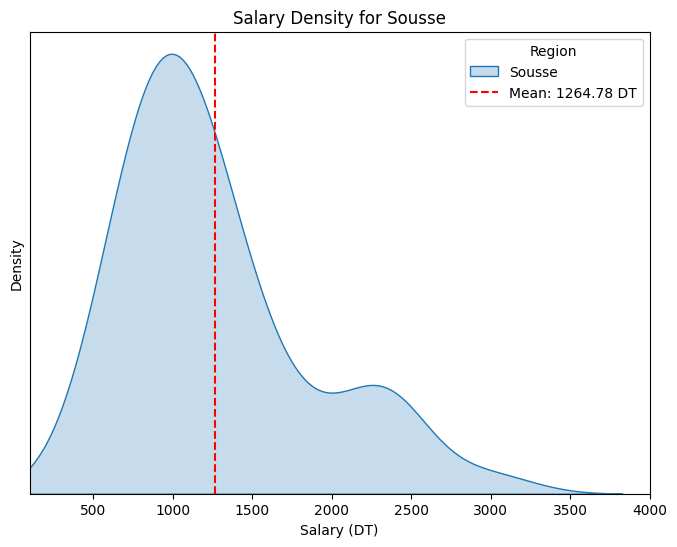

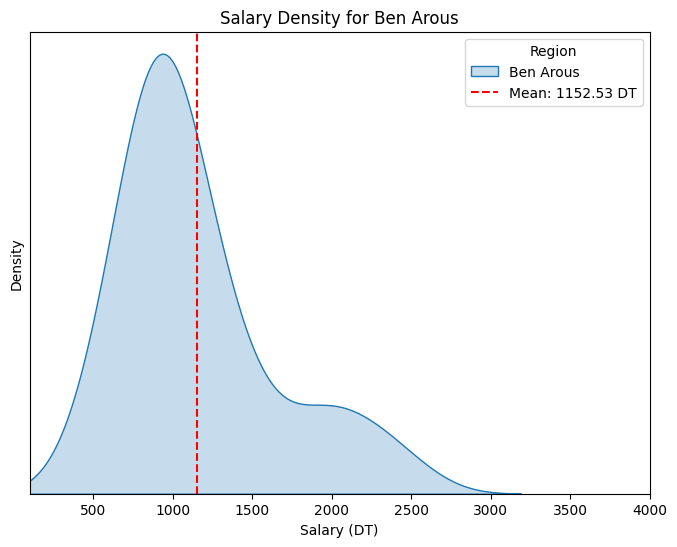

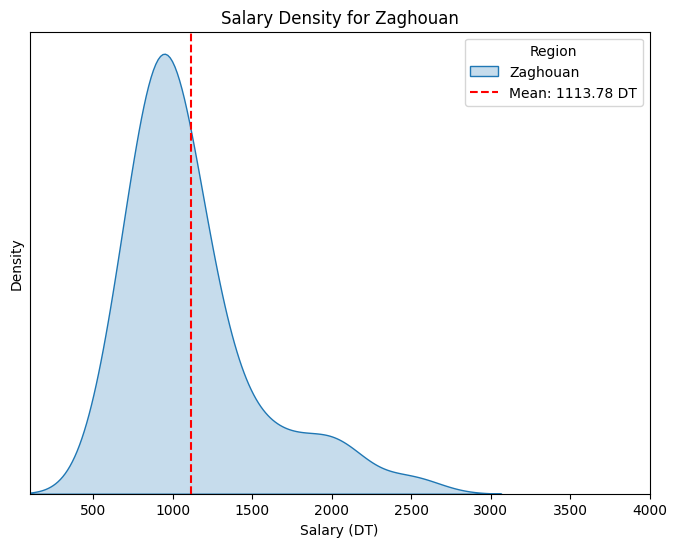

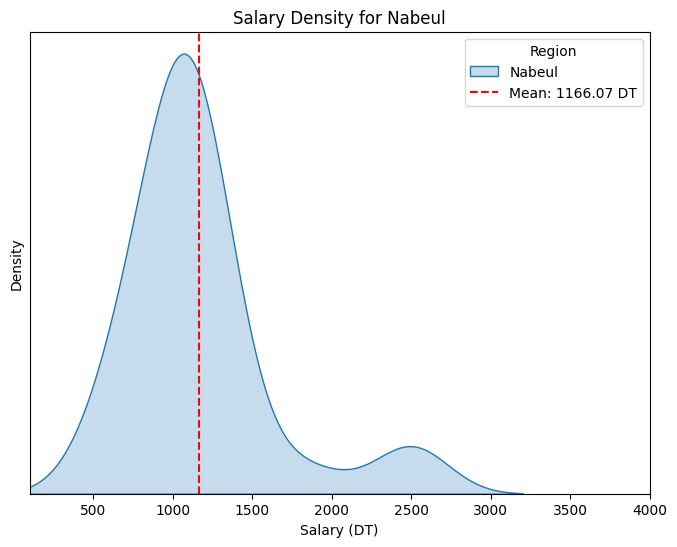

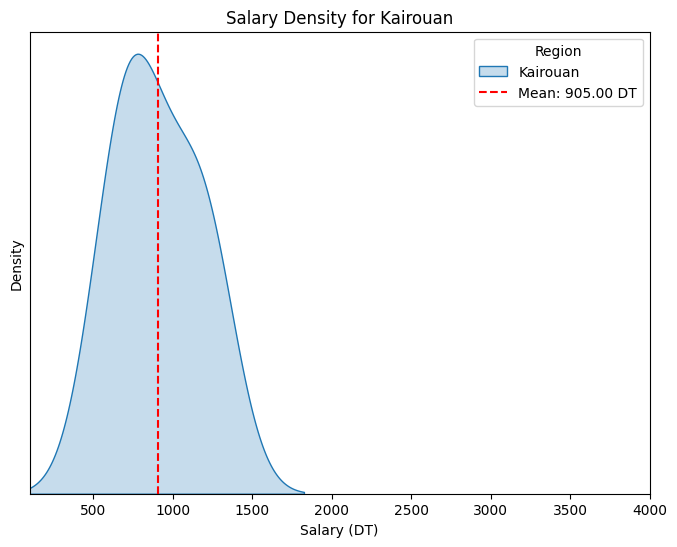

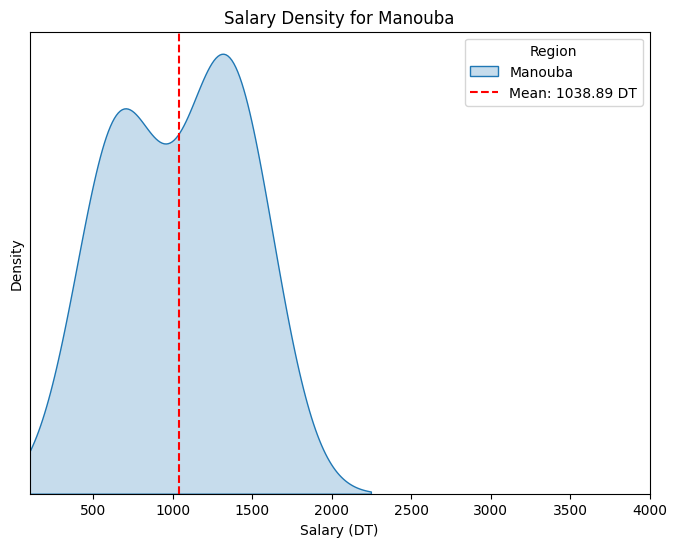

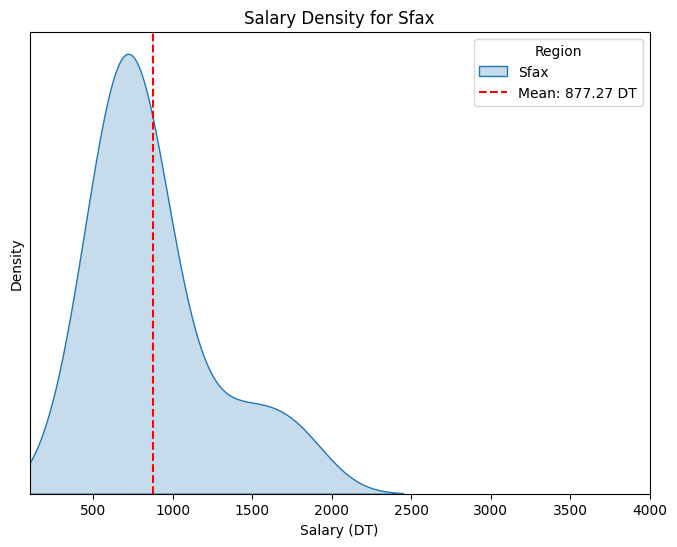

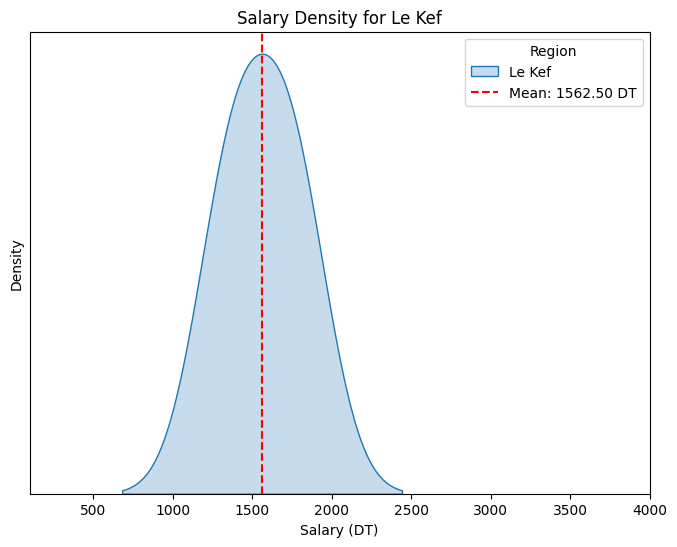

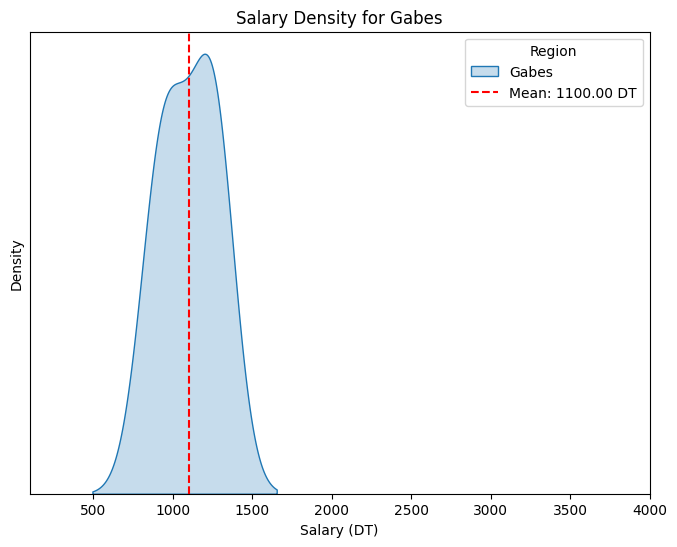

C:\Users\21692\AppData\Local\Temp\ipykernel_130704\3870575083.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)


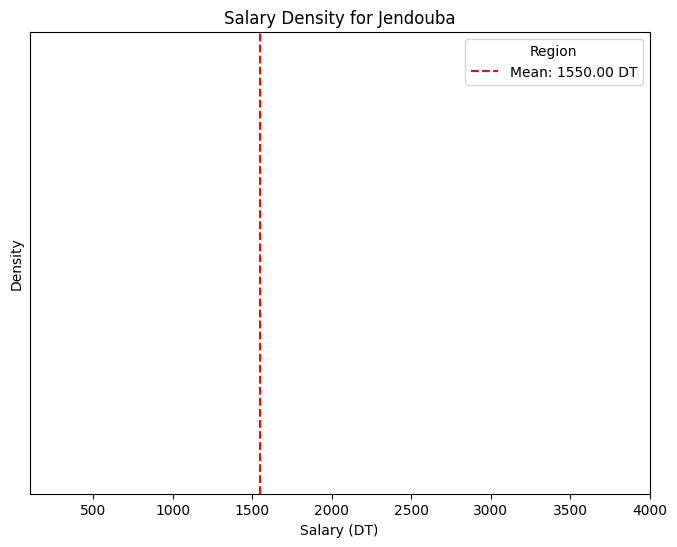

C:\Users\21692\AppData\Local\Temp\ipykernel_130704\3870575083.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)


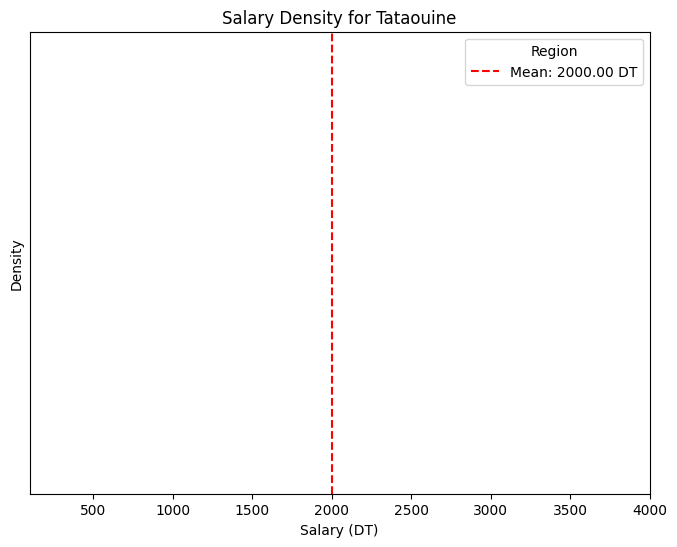

C:\Users\21692\AppData\Local\Temp\ipykernel_130704\3870575083.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)


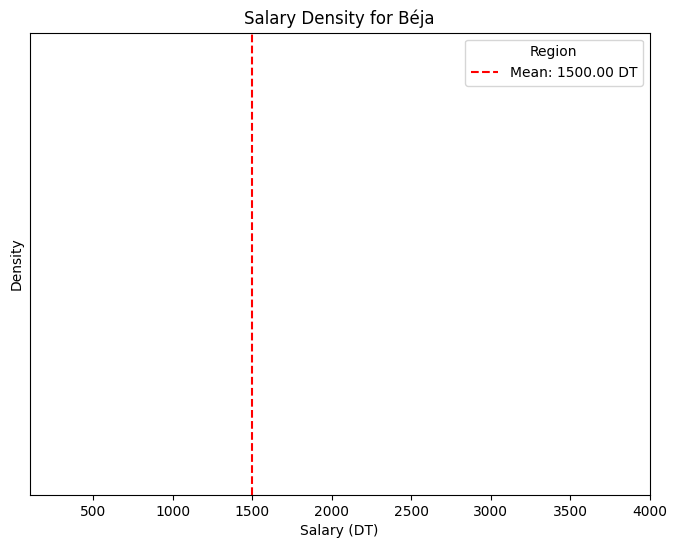

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# Split the "Region" column into individual regions, stack, and strip whitespace
all_regions = valid_salaries["Region"].str.split(" - | & |, ", expand=True).stack().str.strip()

# Standardize region names
all_regions.replace({"La Manouba": "Manouba"}, inplace=True)

# Create a separate plot for each region
for region in all_regions.unique():
    # Filter rows with the specific region
    region_data = valid_salaries[valid_salaries["Region"].str.contains(region, case=False, na=False)]
    
    # Check if there are valid salaries for this region
    if region_data['Processed_Salary'].notna().any():
        # Create a new figure for each region
        plt.figure(figsize=(8, 6))
        
        # Plot the density of the region's salary
        sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)
        
        # Calculate the mean salary for the region
        region_mean = region_data['Processed_Salary'].mean()

        # Add a vertical line for the mean salary
        plt.axvline(region_mean, color='red', linestyle='--', label=f'Mean: {region_mean:.2f} DT')

        # Customize the plot
        plt.title(f'Salary Density for {region}')
        plt.xlabel('Salary (DT)')
        plt.ylabel('Density')
        plt.xlim(100, 4000)  # Limit the salary range for the plot
        plt.legend(title='Region')

        # Remove y-axis labels
        plt.yticks([])

        # Display the plot
        plt.show()


C:\Users\21692\AppData\Local\Temp\ipykernel_80440\2741340182.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_salaries['Region'] = valid_salaries['Region'].str.split(" - | & |, ", expand=True).stack().str.strip().reset_index(drop=True)


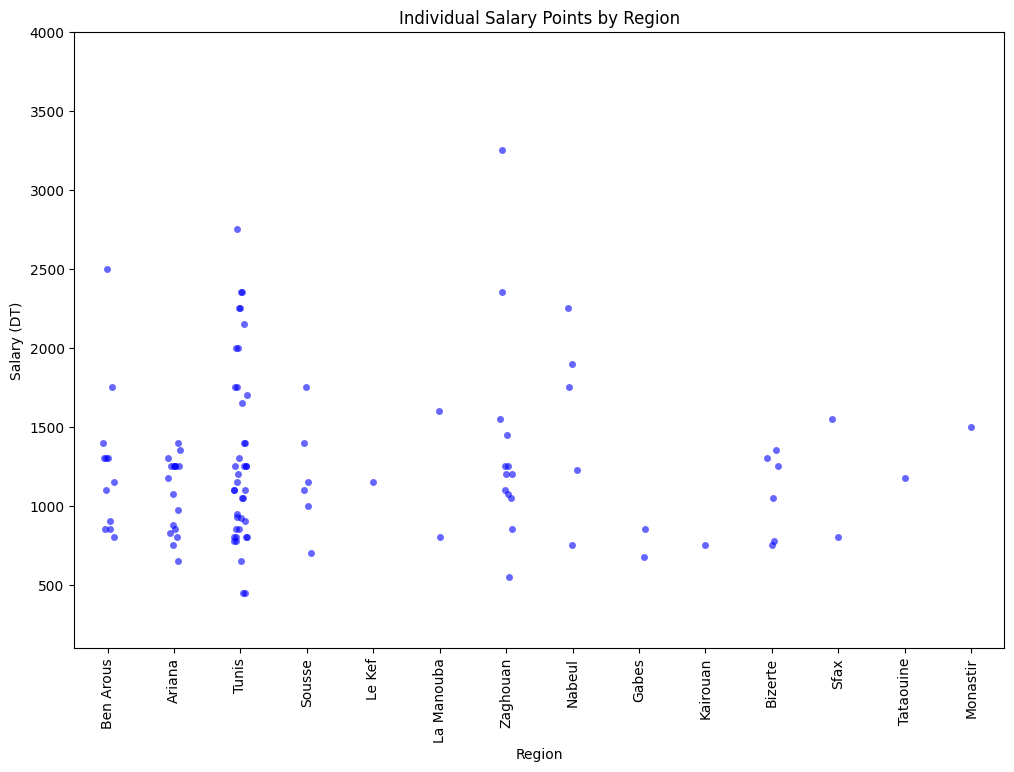

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# Split the "Region" column into individual regions, stack, and strip whitespace
all_regions = valid_salaries["Region"].str.split(" - | & |, ", expand=True).stack().str.strip()

# Standardize region names
all_regions.replace({"La Manouba": "Manouba"}, inplace=True)

# Create a new column 'Region' for each individual region
valid_salaries['Region'] = valid_salaries['Region'].str.split(" - | & |, ", expand=True).stack().str.strip().reset_index(drop=True)

# Create a strip plot for salary values by region
plt.figure(figsize=(12, 8))
sns.stripplot(x="Region", y="Processed_Salary", data=valid_salaries, jitter=True, color='blue', alpha=0.6)

# Customize the plot
plt.title('Individual Salary Points by Region')
plt.xlabel('Region')
plt.ylabel('Salary (DT)')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.ylim(100, 4000)  # Limit the salary range for better visualization

# Show the plot
plt.show()


In [25]:
import pandas as pd

# Count valid salary values for each region
valid_salary_counts = {}

for region in all_regions.unique():
    # Filter rows with the specific region
    region_data = valid_salaries[valid_salaries["Region"].str.contains(region, case=False, na=False)]
    
    # Count the valid salary values for this region (non-NaN values)
    valid_count = region_data['Processed_Salary'].notna().sum()
    
    # Store the result in the dictionary
    valid_salary_counts[region] = valid_count

# Print the counts for each region
for region, count in valid_salary_counts.items():
    print(f"Region: {region} - Valid Salary Values: {count}")


Region: Monastir - Valid Salary Values: 8
Region: Ariana - Valid Salary Values: 114
Region: Tunis - Valid Salary Values: 207
Region: Bizerte - Valid Salary Values: 17
Region: Sousse - Valid Salary Values: 44
Region: Ben Arous - Valid Salary Values: 43
Region: Zaghouan - Valid Salary Values: 47
Region: Nabeul - Valid Salary Values: 28
Region: Kairouan - Valid Salary Values: 5
Region: Manouba - Valid Salary Values: 9
Region: Sfax - Valid Salary Values: 11
Region: Le Kef - Valid Salary Values: 2
Region: Gabes - Valid Salary Values: 4
Region: Jendouba - Valid Salary Values: 1
Region: Tataouine - Valid Salary Values: 1
Region: Béja - Valid Salary Values: 1


Nombre d'offres par niveau d'étude :
Bac: 148
1: 86
2: 199
3: 775
4: 193
5: 395
Qualification avant bac: 56
Formations professionnelles: 93
Autres: 162
249                         Bac + 5
250                         Bac + 2
253     Formations professionnelles
260                         Bac + 3
263     Formations professionnelles
                   ...             
1470                        Bac + 3
1473                        Bac + 5
1475                        Bac + 3
1476                        Bac + 3
1481                        Bac + 3
Name: Study Level, Length: 542, dtype: object


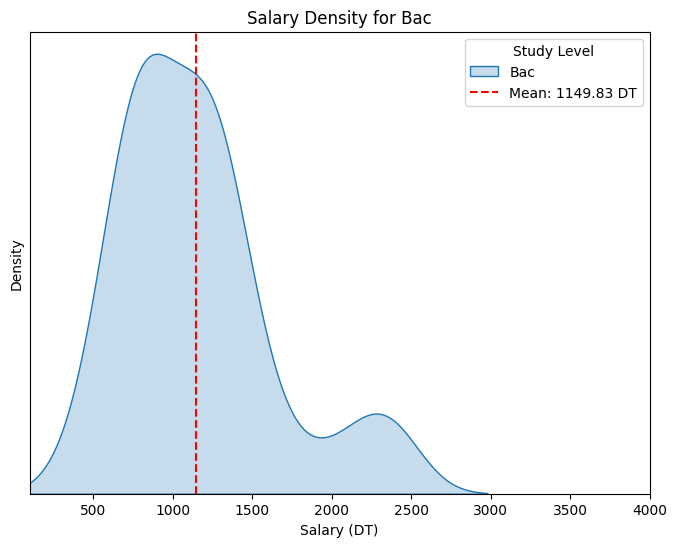

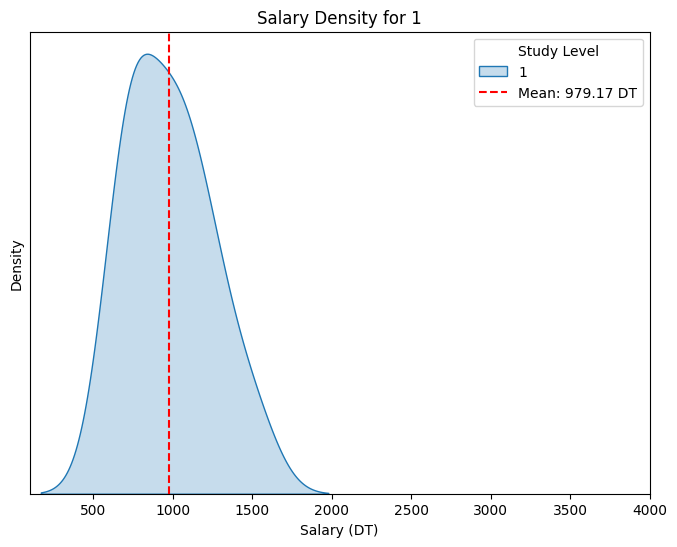

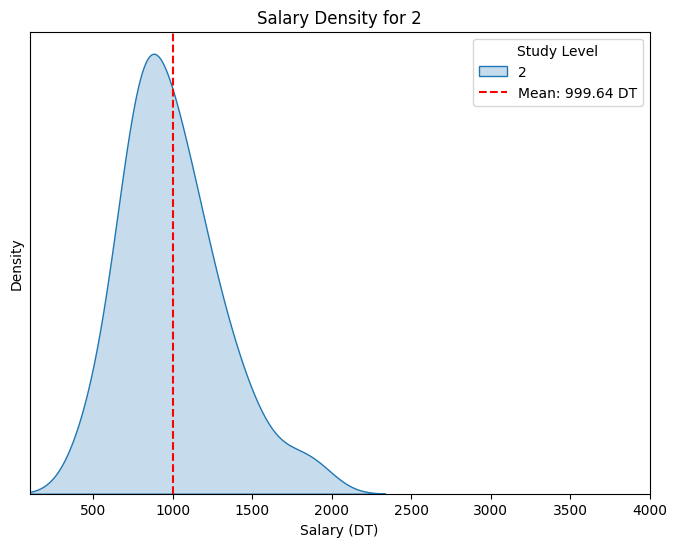

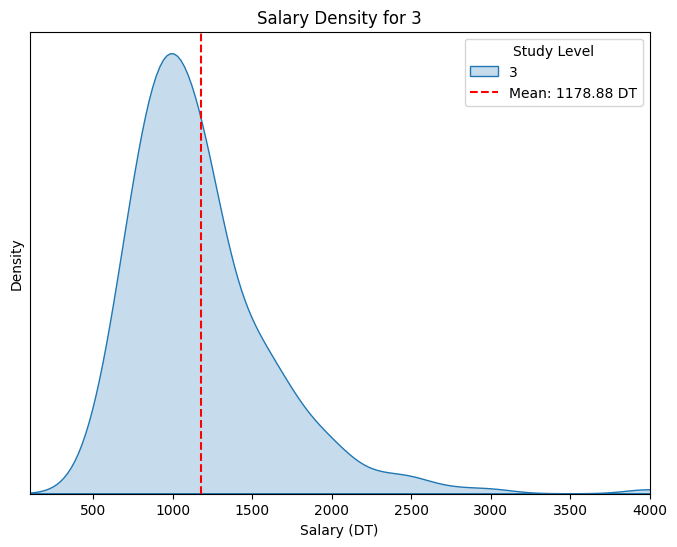

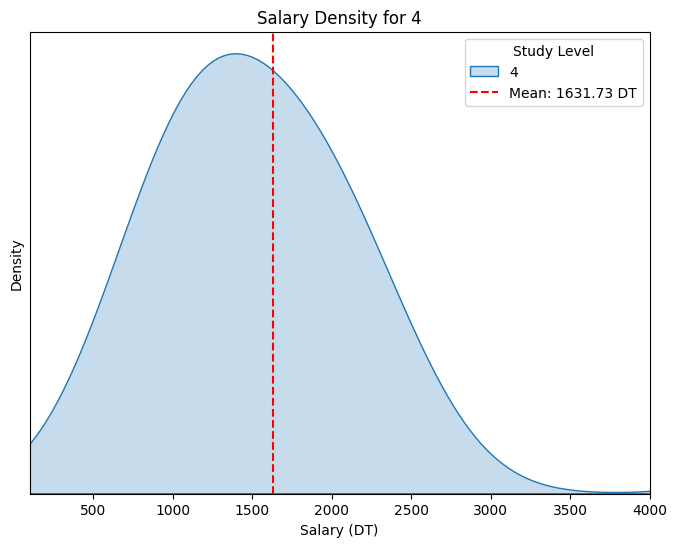

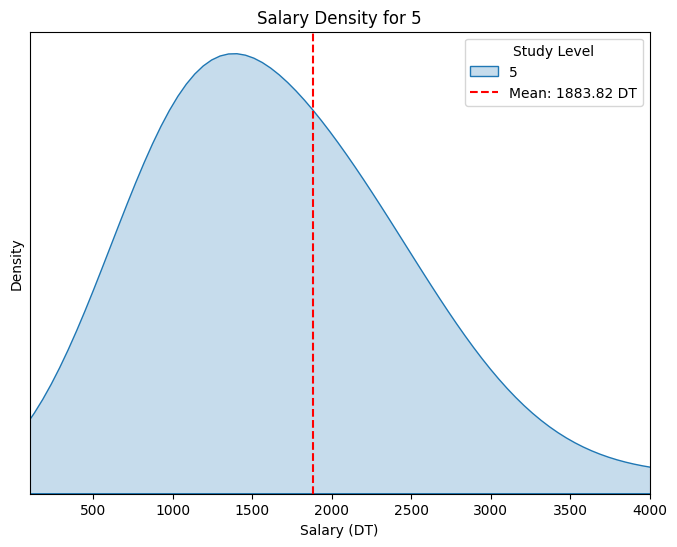

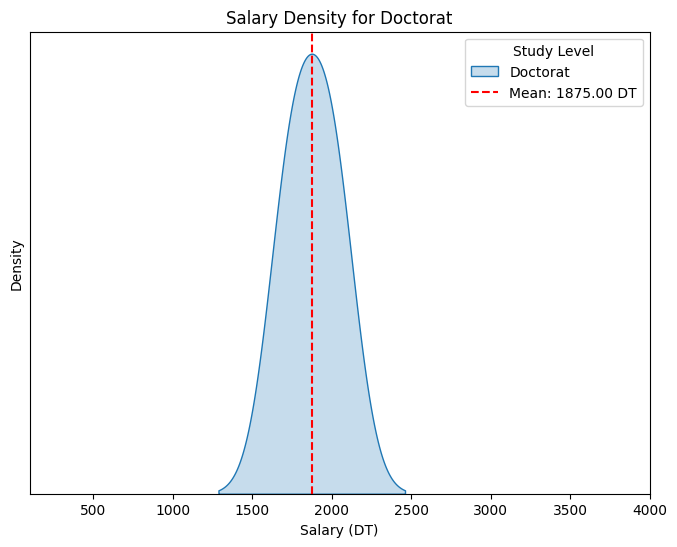

C:\Users\21692\AppData\Local\Temp\ipykernel_80440\123083215.py:85: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(study_level_data['Processed_Salary'], label=level, fill=True)


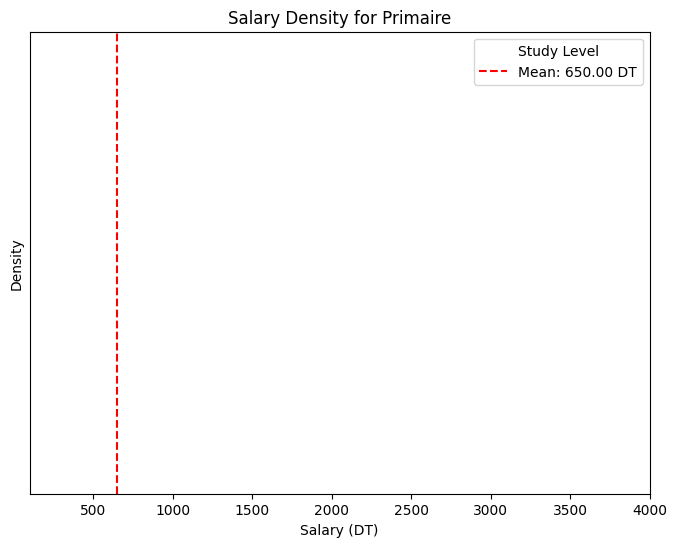

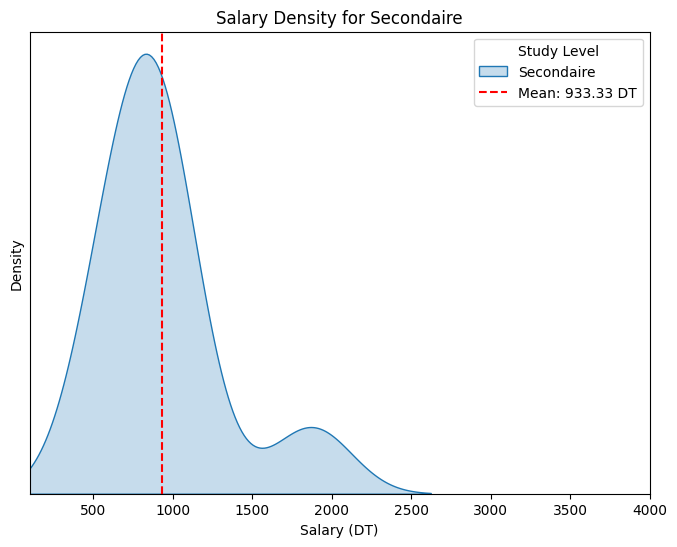

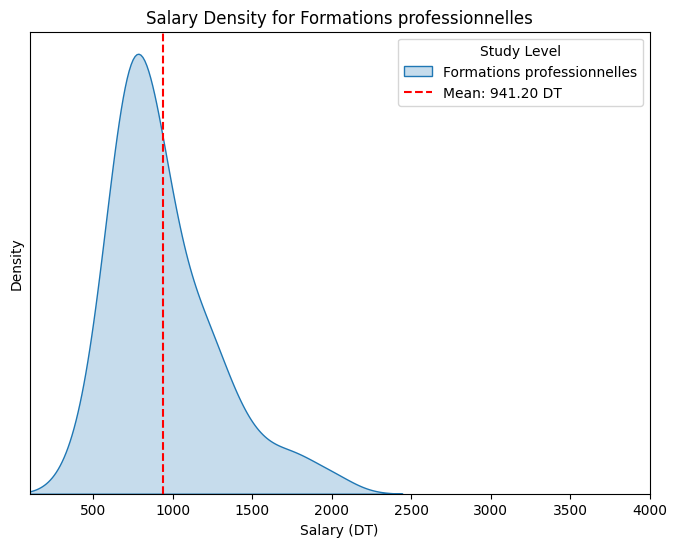

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# List of unique study levels
unique_Study_Levels = ['Bac', '1', '2', '3', '4', '5', 'Doctorat', 'Expert Recherche', 
                       'Primaire', 'Secondaire', 'Qualification avant bac', 'et plus', 'Formations professionnelles']

# Initialize the dictionary to store study level counts
study_level_counts = {}

# Separate Bac and Bac+ levels correctly
for level in unique_Study_Levels:
    if "Bac+" in level:  # Bac+ levels
        count_spaces = combined_df[combined_df["Study Level"].str.contains(r'\bBac\s*\+\s*' + re.escape(level.split('+')[1]) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count_spaces
    elif "Bac" in level:  # Bac level without Bac+
        count_bac = combined_df[combined_df["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                               ~combined_df["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)].shape[0]
        study_level_counts['Bac'] = count_bac
    else:  # Other levels
        count = combined_df[combined_df["Study Level"].str.contains(r'\b' + re.escape(level) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count

# Merge the secondary category "Secondaire" into "Qualification avant bac"
study_level_counts["Qualification avant bac"] += study_level_counts.pop("Secondaire", 0)

# Aggregate other categories into "Autres"
autres_categories = ["Primaire", "Expert Recherche", "et plus", "Doctorat"]
study_level_counts["Autres"] = sum([study_level_counts.pop(cat, 0) for cat in autres_categories])

# Display study level counts
print("Nombre d'offres par niveau d'étude :")
for level, count in study_level_counts.items():
    print(f"{level}: {count}")

print(valid_salaries["Study Level"])

# Create a separate plot for each study level's salary distribution
# Loop through each study level for plotting
for level in unique_Study_Levels:
    # Special handling for the "Bac" level to exclude "Bac+" levels
    if level == "Bac":
        study_level_data = valid_salaries[valid_salaries["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                                         ~valid_salaries["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)]
    else:
        study_level_data = valid_salaries[valid_salaries["Study Level"].str.contains(level, case=False, na=False)]

    # Check if there are valid salaries for this study level
    if study_level_data['Processed_Salary'].notna().any():
        # Create a new figure for each study level
        plt.figure(figsize=(8, 6))

        # Plot the density of the study level's salary
        sns.kdeplot(study_level_data['Processed_Salary'], label=level, fill=True)

        # Calculate the mean salary for the study level
        level_mean = study_level_data['Processed_Salary'].mean()

        # Add a vertical line for the mean salary
        plt.axvline(level_mean, color='red', linestyle='--', label=f'Mean: {level_mean:.2f} DT')

        # Customize the plot
        plt.title(f'Salary Density for {level}')
        plt.xlabel('Salary (DT)')
        plt.ylabel('Density')
        plt.xlim(100, 4000)  # Limit the salary range for the plot
        plt.legend(title='Study Level')

        # Remove y-axis labels
        plt.yticks([])

        # Display the plot
        plt.show()



Nombre d'offres par niveau d'étude :
Bac: 148
1: 86
2: 199
3: 775
4: 193
5: 395
Qualification avant bac: 56
Formations professionnelles: 93
Autres: 162
249                         Bac + 5
250                         Bac + 2
253     Formations professionnelles
260                         Bac + 3
263     Formations professionnelles
                   ...             
1470                        Bac + 3
1473                        Bac + 5
1475                        Bac + 3
1476                        Bac + 3
1481                        Bac + 3
Name: Study Level, Length: 542, dtype: object


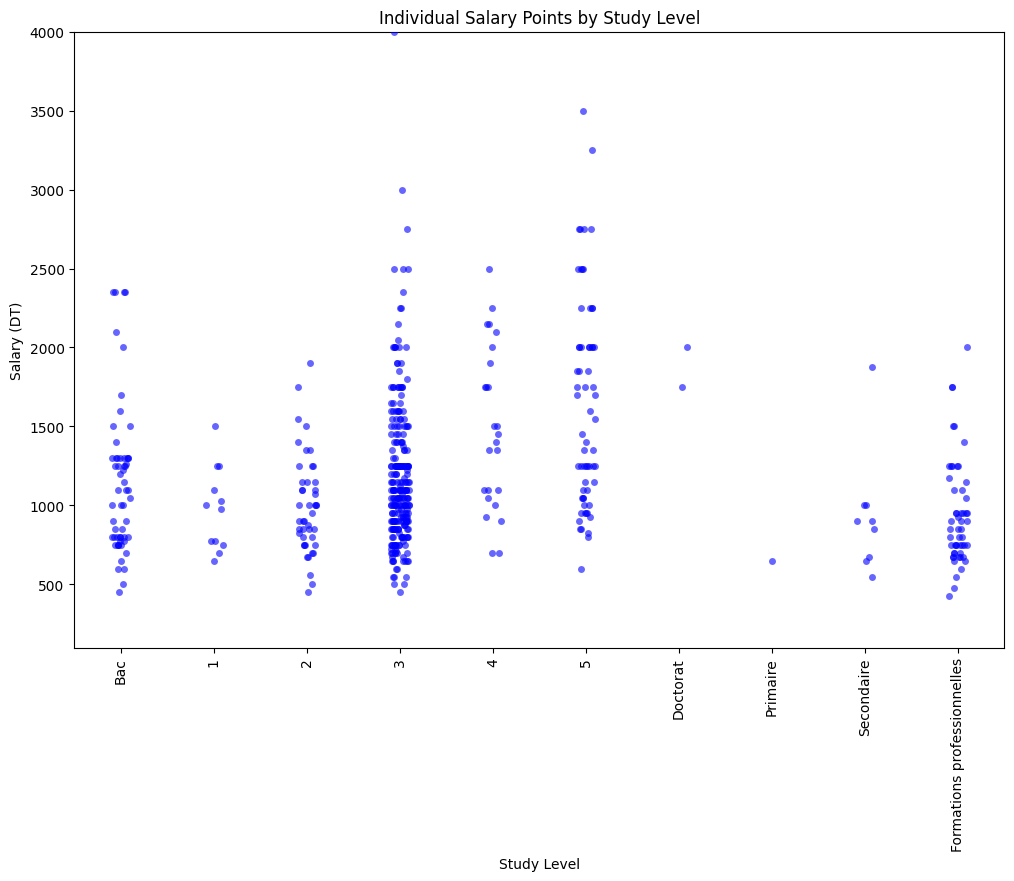

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# List of unique study levels
unique_Study_Levels = ['Bac', '1', '2', '3', '4', '5', 'Doctorat', 'Expert Recherche', 
                       'Primaire', 'Secondaire', 'Qualification avant bac', 'et plus', 'Formations professionnelles']

# Initialize the dictionary to store study level counts
study_level_counts = {}

# Separate Bac and Bac+ levels correctly
for level in unique_Study_Levels:
    if "Bac+" in level:  # Bac+ levels
        count_spaces = combined_df[combined_df["Study Level"].str.contains(r'\bBac\s*\+\s*' + re.escape(level.split('+')[1]) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count_spaces
    elif "Bac" in level:  # Bac level without Bac+
        count_bac = combined_df[combined_df["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                               ~combined_df["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)].shape[0]
        study_level_counts['Bac'] = count_bac
    else:  # Other levels
        count = combined_df[combined_df["Study Level"].str.contains(r'\b' + re.escape(level) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count

# Merge the secondary category "Secondaire" into "Qualification avant bac"
study_level_counts["Qualification avant bac"] += study_level_counts.pop("Secondaire", 0)

# Aggregate other categories into "Autres"
autres_categories = ["Primaire", "Expert Recherche", "et plus", "Doctorat"]
study_level_counts["Autres"] = sum([study_level_counts.pop(cat, 0) for cat in autres_categories])

# Display study level counts
print("Nombre d'offres par niveau d'étude :")
for level, count in study_level_counts.items():
    print(f"{level}: {count}")

print(valid_salaries["Study Level"])

# Create a strip plot for salary values by study level
# Loop through each study level for plotting
plt.figure(figsize=(12, 8))  # Set the figure size for better visualization

for level in unique_Study_Levels:
    # Special handling for the "Bac" level to exclude "Bac+" levels
    if level == "Bac":
        study_level_data = valid_salaries[valid_salaries["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                                         ~valid_salaries["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)]
    else:
        study_level_data = valid_salaries[valid_salaries["Study Level"].str.contains(level, case=False, na=False)]

    # Check if there are valid salaries for this study level
    if study_level_data['Processed_Salary'].notna().any():
        # Plot the individual salary points using stripplot
        sns.stripplot(x=[level] * len(study_level_data), y=study_level_data['Processed_Salary'], jitter=True, color='blue', alpha=0.6)

# Customize the plot
plt.title('Individual Salary Points by Study Level')
plt.xlabel('Study Level')
plt.ylabel('Salary (DT)')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.ylim(100, 4000)  # Limit the salary range for better visualization

# Show the plot
plt.show()


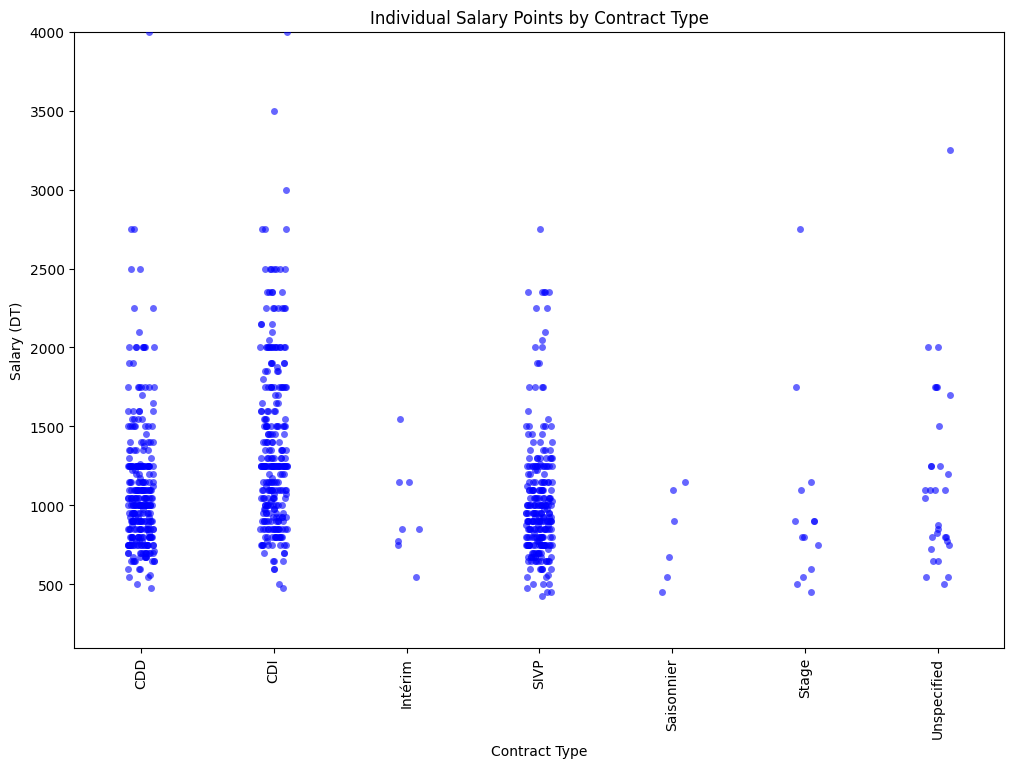

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# List of unique contract types
unique_contract_types = ['Alternance', 'CDD', 'CDI', 'Fonction publique', 'Indépendant-Freelance', 
                         'Intérim', 'Stage-PFE', 'SIVP', 'Saisonnier', 'Stage', 'Statutaire', 
                         'Temps partiel', 'Unspecified']

# Create a strip plot for salary values by contract type
# Loop through each contract type for plotting
plt.figure(figsize=(12, 8))  # Set the figure size for better visualization

for contract_type in unique_contract_types:
    # Filter the valid salaries for the current contract type
    contract_type_data = valid_salaries[valid_salaries["Contract Type"].str.contains(contract_type, case=False, na=False)]

    # Check if there are valid salaries for this contract type
    if contract_type_data['Processed_Salary'].notna().any():
        # Plot the individual salary points using stripplot
        sns.stripplot(x=[contract_type] * len(contract_type_data), 
                      y=contract_type_data['Processed_Salary'], 
                      jitter=True, color='blue', alpha=0.6)

# Customize the plot
plt.title('Individual Salary Points by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Salary (DT)')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.ylim(100, 4000)  # Limit the salary range for better visualization

# Show the plot
plt.show()


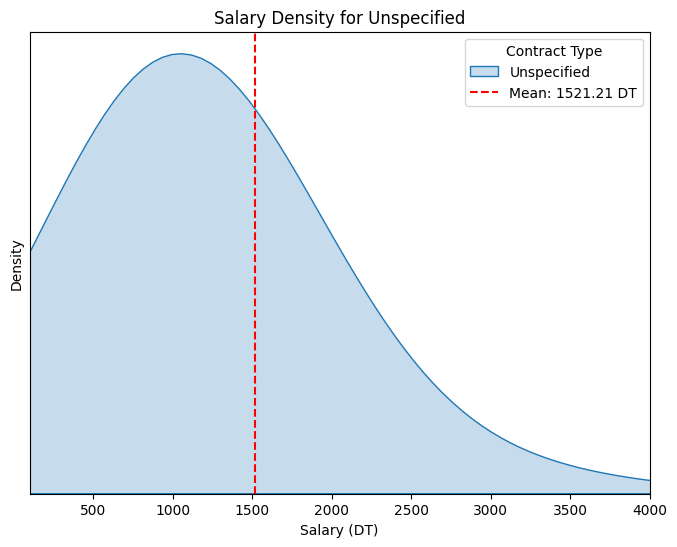

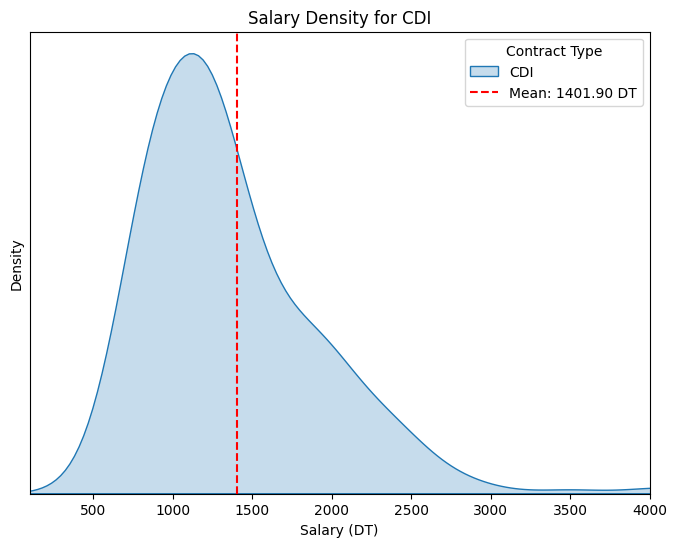

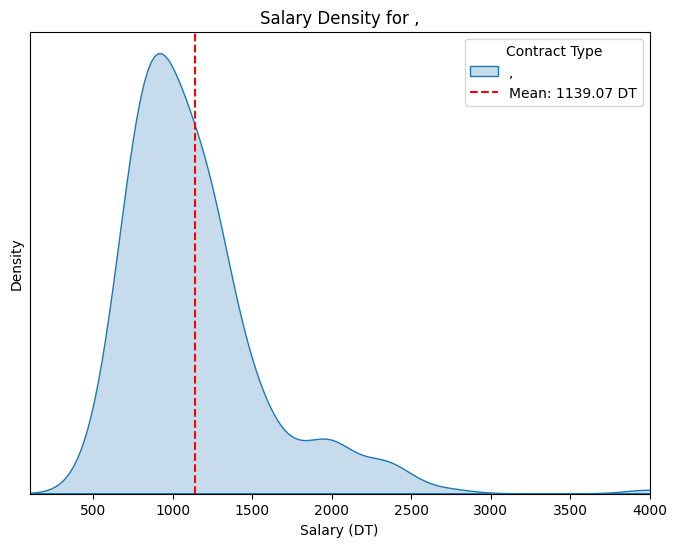

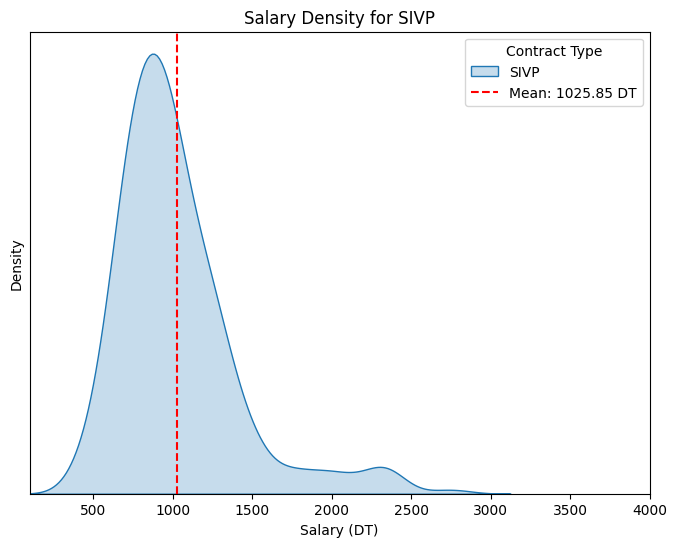

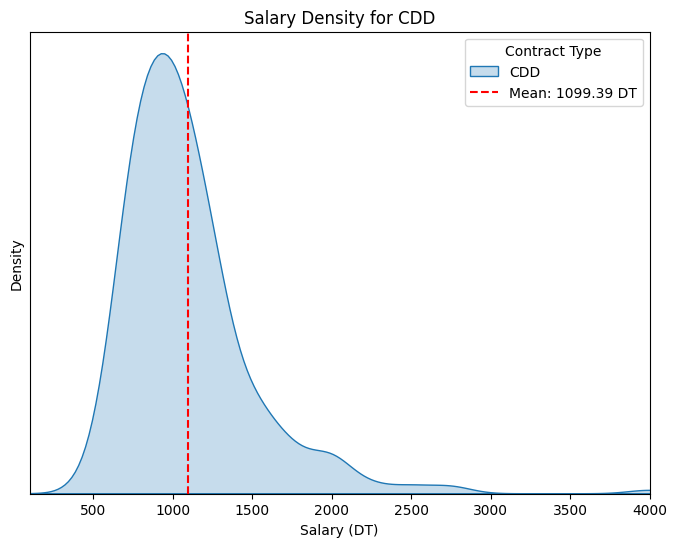

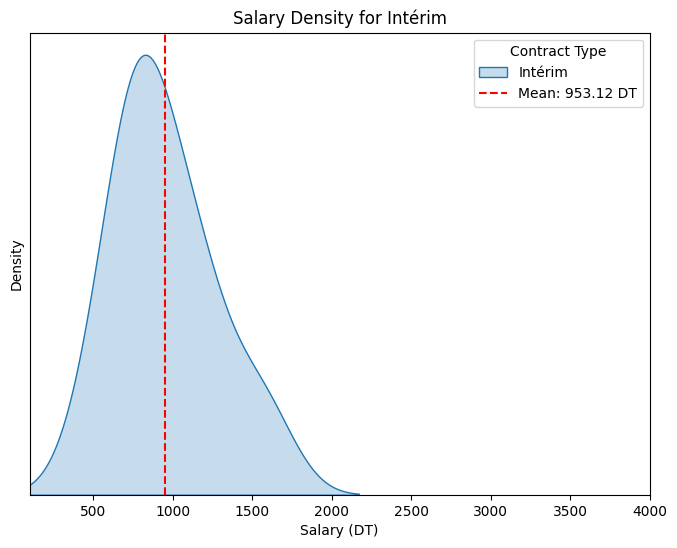

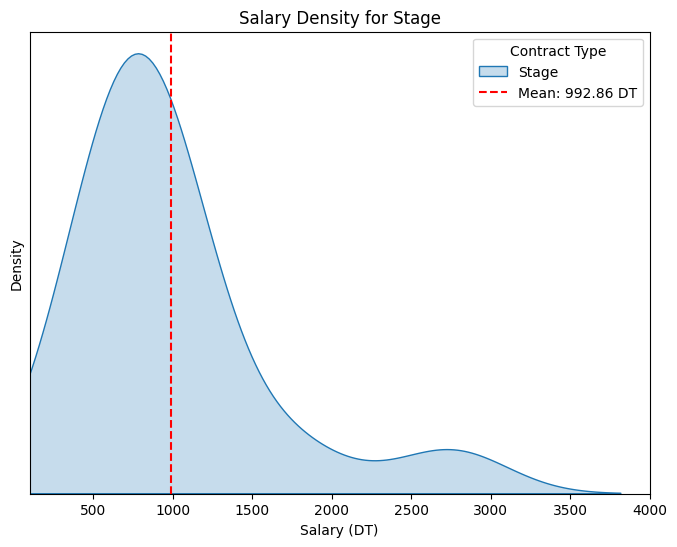

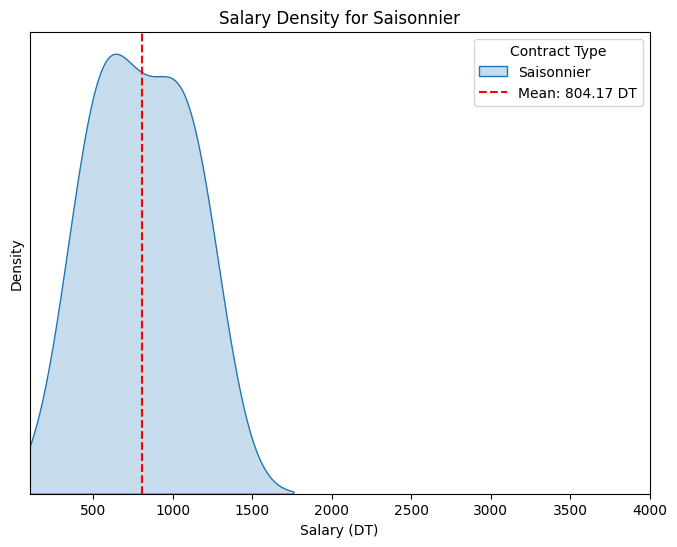

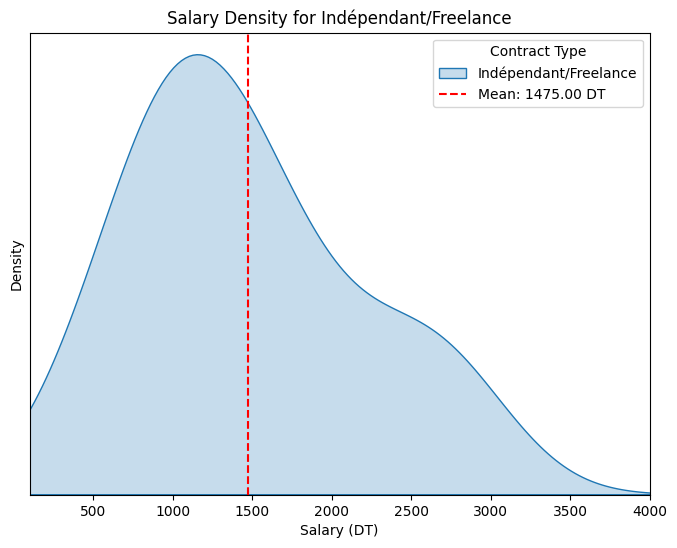

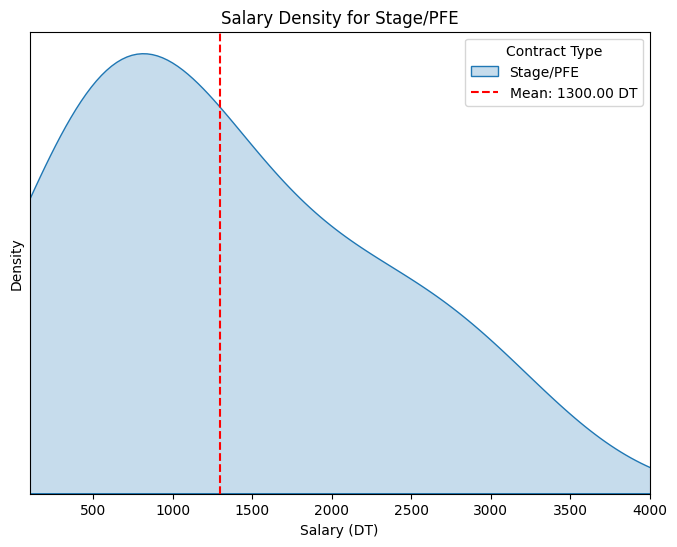

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# Split the "Contract Type" column into individual types, stack, and strip whitespace
all_contract_types = valid_salaries["Contract Type"].str.split(" - | & |, ", expand=True).stack().str.strip()

# Standardize contract type names
all_contract_types.replace({"Indépendant": "Indépendant-Freelance"}, inplace=True)

# Create a separate plot for each contract type
for contract_type in all_contract_types.unique():
    # Filter rows with the specific contract type
    contract_type_data = valid_salaries[valid_salaries["Contract Type"].str.contains(contract_type, case=False, na=False)]
    
    # Check if there are valid salaries for this contract type
    if contract_type_data['Processed_Salary'].notna().any():
        # Create a new figure for each contract type
        plt.figure(figsize=(8, 6))
        
        # Plot the density of the contract type's salary
        sns.kdeplot(contract_type_data['Processed_Salary'], label=contract_type, fill=True)
        
        # Calculate the mean salary for the contract type
        contract_type_mean = contract_type_data['Processed_Salary'].mean()

        # Add a vertical line for the mean salary
        plt.axvline(contract_type_mean, color='red', linestyle='--', label=f'Mean: {contract_type_mean:.2f} DT')

        # Customize the plot
        plt.title(f'Salary Density for {contract_type}')
        plt.xlabel('Salary (DT)')
        plt.ylabel('Density')
        plt.xlim(100, 4000)  # Limit the salary range for the plot
        plt.legend(title='Contract Type')

        # Remove y-axis labels
        plt.yticks([])

        # Display the plot
        plt.show()


In [36]:
import re

# Count valid salary values for each study level
valid_salary_counts_study_level = {}

for level in unique_Study_Levels:
    # Check for Bac+ levels specifically
    if "Bac+" in level:
        # Match the specific "Bac+X" level (e.g., Bac+1, Bac+2, etc.)
        count_bac_plus = valid_salaries[valid_salaries["Study Level"].str.contains(r'\bBac\s*\+\s*' + re.escape(level.split('+')[1]) + r'\b', case=False, na=False)].shape[0]
        valid_salary_counts_study_level[level] = count_bac_plus
    else:
        # For regular levels (like Bac, Doctorat, etc.), match those
        count = valid_salaries[valid_salaries["Study Level"].str.contains(r'\b' + re.escape(level) + r'\b', case=False, na=False)].shape[0]
        valid_salary_counts_study_level[level] = count

# For Bac (without Bac+), subtract Bac+ levels' counts
bac_count = valid_salary_counts_study_level.get('Bac', 0)
for i in range(1, 6):  # Bac+1 to Bac+5
    bac_plus_level = f'Bac+{i}'
    bac_count -= valid_salary_counts_study_level.get(bac_plus_level, 0)

valid_salary_counts_study_level['Bac'] = bac_count

# Print the counts for each study level
for level, count in valid_salary_counts_study_level.items():
    print(f"Study Level: {level} - Valid Salary Values: {count}")


Study Level: Bac - Valid Salary Values: 58
Study Level: Bac+1 - Valid Salary Values: 12
Study Level: Bac+2 - Valid Salary Values: 45
Study Level: Bac+3 - Valid Salary Values: 267
Study Level: Bac+4 - Valid Salary Values: 26
Study Level: Bac+5 - Valid Salary Values: 68
Study Level: Doctorat - Valid Salary Values: 2
Study Level: Expert Recherche - Valid Salary Values: 0
Study Level: Primaire - Valid Salary Values: 1
Study Level: Secondaire - Valid Salary Values: 9
Study Level: Qualification avant bac - Valid Salary Values: 0
Study Level: et plus - Valid Salary Values: 0
Study Level: Formations professionnelles - Valid Salary Values: 54


In [18]:
combined_df["Experience Level"].unique()


array(['Etudiant, jeune diplômé et plus', 'Débutant < 2 ans et plus',
       'Expérience entre 2 ans et 5 ans et plus',
       'Expérience entre 2 ans et 5 ans',
       'Débutant < 2 ans & Expérience entre 2 ans et 5 ans',
       'Débutant < 2 ans', 'Etudiant, jeune diplômé',
       'Expérience entre 5 ans et 10 ans - Expérience > 10 ans',
       'Expérience > 10 ans',
       'Expérience entre 5 ans et 10 ans & Expérience > 10 ans',
       'Etudiant, jeune diplômé & Débutant < 2 ans',
       'Etudiant, jeune diplômé - Débutant < 2 ans',
       'Expérience entre 2 ans et 5 ans & Expérience entre 5 ans et 10 ans',
       'Expérience entre 5 ans et 10 ans', 'Aucune expérience',
       "Moins d'un an", 'Entre 2 et 5 ans', 'Entre 1 et 2 ans',
       'Plus que 10 ans', 'Entre 5 et 10 ans'], dtype=object)

In [29]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Seed for reproducibility
np.random.seed(42)
random.seed(42)
fake = Faker()

# --- Step 1: Define dataset parameters ---
num_samples = 1000  # Number of fake job entries

# Features
job_titles = ["Software Engineer", "Accountant", "Nurse", "Teacher", "Project Manager", "Data Scientist", "Marketing Manager"]
companies = [fake.company() for _ in range(20)]
study_levels = ['Bac', 'Bac+1', 'Bac+2', 'Bac+3', 'Bac+4', 'Bac+5', 'Qualification avant bac', 'Formations professionnelles', 'Autres']
contract_types = ["Alternance", "CDD", "CDI", "Fonction publique", "Indépendant-Freelance", "Intérim", "Stage-PFE", 
                  "SIVP", "Saisonnier", "Stage", "Statutaire", "Temps partiel", "Unspecified"]
regions = ["Tunis", "Sfax", "Sousse", "Gabes", "Bizerte", "Nabeul", "Ariana", "Ben Arous", "Zaghouan", "Monastir", 
           "Médenine", "Kairouan", "Gafsa", "Gafsa", "International", "Le Kef", "Siliana", "Abidjan", "DAKAR", 
           "TRIPOLI", "Tozeur", "Sidi Bouzid", "Tataouine"]
skills_list = ["Python", "Java", "Data Analysis", "Project Management", "Machine Learning", "Communication", 
               "SQL", "Leadership"]
languages_list = ["French", "English", "Arabic"]
mobility_options = ["Remote", "On-site", "Hybrid"]

# Unique Experience Levels
experience_levels = [
    'Etudiant, jeune diplômé et plus', 'Débutant < 2 ans et plus', 'Expérience entre 2 ans et 5 ans et plus', 
    'Expérience entre 2 ans et 5 ans', 'Débutant < 2 ans & Expérience entre 2 ans et 5 ans', 
    'Débutant < 2 ans', 'Etudiant, jeune diplômé', 'Expérience entre 5 ans et 10 ans - Expérience > 10 ans', 
    'Expérience > 10 ans', 'Expérience entre 5 ans et 10 ans & Expérience > 10 ans', 
    'Etudiant, jeune diplômé & Débutant < 2 ans', 'Etudiant, jeune diplômé - Débutant < 2 ans', 
    'Expérience entre 2 ans et 5 ans & Expérience entre 5 ans et 10 ans', 'Expérience entre 5 ans et 10 ans', 
    'Aucune expérience', "Moins d'un an", 'Entre 2 et 5 ans', 'Entre 1 et 2 ans', 'Plus que 10 ans', 'Entre 5 et 10 ans'
]

# --- Step 2: Define controlled distribution for study levels ---
study_level_counts = {
    'Bac': 148,
    'Bac+1': 86,
    'Bac+2': 199,
    'Bac+3': 775,
    'Bac+4': 193,
    'Bac+5': 395,
    'Qualification avant bac': 56,
    'Formations professionnelles': 93,
    'Autres': 162
}

# --- Step 3: Generate controlled study level data ---
study_levels_list = np.random.choice(
    list(study_level_counts.keys()), 
    size=num_samples, 
    p=[study_level_counts[key] / sum(study_level_counts.values()) for key in study_level_counts]
)

# --- Step 4: Generate correlated salary and experience ---
# Base mean salary around the central range (900-1250 DT), with a standard deviation to reflect variation
mean_salary = 1100  # Central value of salary distribution
salary_std_dev = 250  # Standard deviation for salary variation
min_salary = 300
max_salary = 4000

# Generate salaries with added experience and education effect
def generate_salary(experience, study_level, region):
    # Basic salary centered around mean_salary with some randomness
    salary = np.random.normal(mean_salary, salary_std_dev)
    salary = np.clip(salary, min_salary, max_salary)
    
    # Adjust salary based on experience level
    if experience in ['Expérience > 10 ans', 'Expérience entre 5 ans et 10 ans']:
        salary *= 1.5  # Increase by 50% for more experienced profiles
    elif experience in ['Expérience entre 2 ans et 5 ans']:
        salary *= 1.2  # Increase by 20% for mid-level experience
    elif experience in ['Débutant < 2 ans', 'Aucune expérience']:
        salary *= 0.8  # Decrease by 20% for entry-level or no experience
    
    # Adjust salary based on study level
    if study_level in ['Doctorat', 'Expert Recherche']:
        salary *= 1.4  # Increase by 40% for higher education (PhD, Research Expert)
    elif study_level in ['Bac+5']:
        salary *= 1.3  # Increase by 30% for Master's level
    elif study_level in ['Bac+4', 'Bac+3']:
        salary *= 1.1  # Increase by 10% for Bachelor's level
    elif study_level == 'Bac':
        salary *= 1.05  # Slight increase for Bac
    
    # Adjust salary based on region (higher salary for Tunis)
    if region == ('Tunis' or 'Ariana' or 'Ben Arous'):
        salary *= 1.2  # Increase by 20% for jobs in Tunis
    if region == ('Manouba' or 'Sousse' or 'Monastir'):
        salary *= 1.1
    if region == ('Bizerte' or 'Sfax' or 'Nabeul'):
        salary *= 1.05
    if region == ('Tataouine' or 'Tozeur' or 'Gafsa'):
        salary *= 0.9
    return int(np.clip(salary, min_salary, max_salary))    # Ensure salary is within valid range

# --- Step 5: Generate other features ---
job_titles_list = np.random.choice(job_titles, size=num_samples)
companies_list = [fake.company() for _ in range(num_samples)]
experience_levels_list = np.random.choice(experience_levels, size=num_samples)
contract_types_list = np.random.choice(contract_types, size=num_samples)
regions_list = np.random.choice(regions, size=num_samples)
skills = [random.sample(skills_list, k=random.randint(2, 5)) for _ in range(num_samples)]
languages = [random.sample(languages_list, k=random.randint(1, 3)) for _ in range(num_samples)]
mobility = np.random.choice(mobility_options, size=num_samples)
posting_dates = pd.date_range(start="2024-01-01", periods=num_samples, freq="D").to_numpy()
np.random.shuffle(posting_dates)
job_links = [f"https://fakejobsite.com/job/{i}" for i in range(1, num_samples+1)]
disponibility = np.random.choice(["Immediate", "In 1 month", "In 3 months"], size=num_samples)

# --- Step 6: Generate Salaries with Adjustments ---
salaries = [generate_salary(experience_levels_list[i], study_levels_list[i], regions_list[i]) for i in range(num_samples)]

# --- Step 7: Combine into a DataFrame ---
fake_jobs = pd.DataFrame({
    "Job Title": job_titles_list,
    "Company Name": companies_list,
    "Study Level": study_levels_list,
    "Experience Level": experience_levels_list,
    "Contract Type": contract_types_list,
    "Region": regions_list,
    "Skills": [", ".join(skill) for skill in skills],
    "Posting Date": posting_dates,
    "Job Link": job_links,
    "Disponibilité": disponibility,
    "Langues": [", ".join(lang) for lang in languages],
    "Salary": salaries,
    "Mobility": mobility
})


# Optional: Save to CSV
fake_jobs.to_csv("fake_job_dataset_with_controlled_study_level.csv", index=False)

fake_jobs.head(10)

,Job Title,Company Name,Study Level,Experience Level,Contract Type,Region,Skills,Posting Date,Job Link,Disponibilité,Langues,Salary,Mobility
0,Marketing Manager,Livingston-Weaver,Bac+3,Entre 1 et 2 ans,Fonction publique,Médenine,"Python, Communication",2024-01-04,https://fakejobsite.com/job/1,In 1 month,English,1070,Hybrid
1,Teacher,Martin-Martinez,Autres,Plus que 10 ans,CDI,TRIPOLI,"Project Management, Java, SQL, Python",2026-08-27,https://fakejobsite.com/job/2,Immediate,"French, English, Arabic",635,On-site
2,Data Scientist,Martin PLC,Bac+5,Expérience entre 2 ans et 5 ans,Unspecified,Sousse,"SQL, Python",2024-02-08,https://fakejobsite.com/job/3,In 1 month,"French, English, Arabic",1805,Remote
3,Nurse,Wheeler Inc,Bac+4,Expérience entre 5 ans et 10 ans & Expérience ...,Stage-PFE,Ben Arous,"Java, Leadership",2024-02-07,https://fakejobsite.com/job/4,In 1 month,"English, French",1197,Remote
4,Marketing Manager,Tyler PLC,Bac+2,"Etudiant, jeune diplômé et plus",Saisonnier,Gafsa,"Python, Machine Learning, Java",2026-08-06,https://fakejobsite.com/job/5,Immediate,"French, Arabic",842,Hybrid
5,Project Manager,"Conner, Herrera and Hanson",Bac+2,Entre 1 et 2 ans,Indépendant-Freelance,Tunis,"Project Management, Leadership, Machine Learni...",2024-04-11,https://fakejobsite.com/job/6,In 1 month,Arabic,1006,Hybrid
6,Software Engineer,"Meyer, Washington and Jones",Bac,Débutant < 2 ans & Expérience entre 2 ans et 5...,Intérim,Gafsa,"SQL, Data Analysis, Leadership",2025-02-02,https://fakejobsite.com/job/7,Immediate,"Arabic, English",1382,Hybrid
7,Marketing Manager,Adkins-Aguirre,Qualification avant bac,Aucune expérience,Stage,Sfax,"Project Management, SQL, Data Analysis",2025-01-27,https://fakejobsite.com/job/8,In 1 month,"French, English, Arabic",488,Remote
8,Project Manager,Marshall-Atkins,Bac+4,Entre 2 et 5 ans,Temps partiel,Tataouine,"Java, Project Management",2025-06-18,https://fakejobsite.com/job/9,Immediate,Arabic,1166,Remote
9,Data Scientist,Proctor-Ross,Bac+5,Expérience entre 2 ans et 5 ans et plus,Temps partiel,Gabes,"Communication, SQL",2025-09-22,https://fakejobsite.com/job/10,In 3 months,"French, Arabic, English",1369,Hybrid
